# NLP 24 Hour Language Style Transfer Challenge

#### 1. Data Collection and Preprocessing:

- Acquire the formal documents for training and testing purposes.
- Collect or generate informal and humorous versions of these documents for training and testing.
- Ensure all documents are in a consistent format, e.g., text or JSON, and clean them of any unnecessary metadata or formatting.

In [1]:
cd /kaggle/working/

/kaggle/working


In [2]:
mkdir processed

In [3]:
mkdir seperate

In [4]:
mkdir test

In [5]:
mkdir val

In [6]:
mkdir train

In [7]:
import pandas as pd

# Path to the Excel file
excel_file_path = "/kaggle/input/dataset/Dataset.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

# Rename columns to 'formal', 'casual', and 'humor' for clarity
df.rename(columns={'Formal': 'formal', 'Casual': 'casual', 'Humor': 'humor'}, inplace=True)

# Extract the titles and paragraphs from the casual and humor text
# Assuming the title is followed by a newline character and then the paragraph
df['title_casual'] = df['casual'].apply(lambda x: x.split('\n')[0].strip())
df['paragraph_casual'] = df['casual'].apply(lambda x: '\n'.join(x.split('\n')[1:]).strip())

df['title_humor'] = df['humor'].apply(lambda x: x.split('\n')[0].strip())
df['paragraph_humor'] = df['humor'].apply(lambda x: '\n'.join(x.split('\n')[1:]).strip())

# Extract the title and paragraph from the formal content
df['title_formal'] = df['formal'].apply(lambda x: x.split('\n')[0].strip())
df['paragraph_formal'] = df['formal'].apply(lambda x: '\n'.join(x.split('\n')[1:]).strip())

# Save the entire content (title and paragraph) to separate CSV files
csv_file_path = "/kaggle/working/seperate/"

# Save the formal content (title and paragraph) to a CSV file
df[['title_formal', 'paragraph_formal']].to_csv(csv_file_path + 'formal_data.csv', index=False)

# Save the casual content (title and paragraph) to a CSV file
df[['title_casual', 'paragraph_casual']].to_csv(csv_file_path + 'casual_data.csv', index=False)

# Save the humor content (title and paragraph) to a CSV file
df[['title_humor', 'paragraph_humor']].to_csv(csv_file_path + 'humor_data.csv', index=False)

# Check if the CSV files are saved successfully
print("CSV files saved successfully.")

CSV files saved successfully.


#### 2. Data Analysis:

- Analyze the dataset to understand the distribution of formal, humorous, and casual documents.
- Explore the linguistic patterns and vocabulary used in each style.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


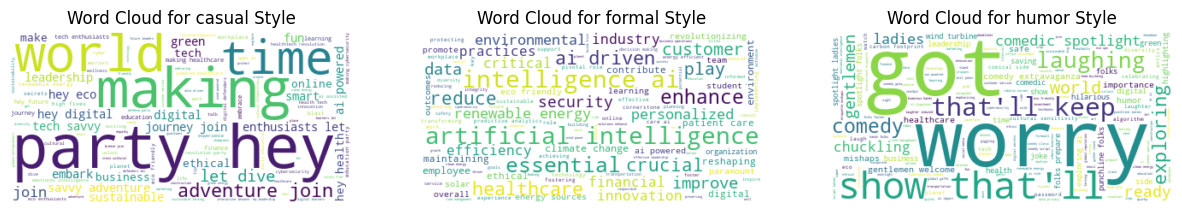

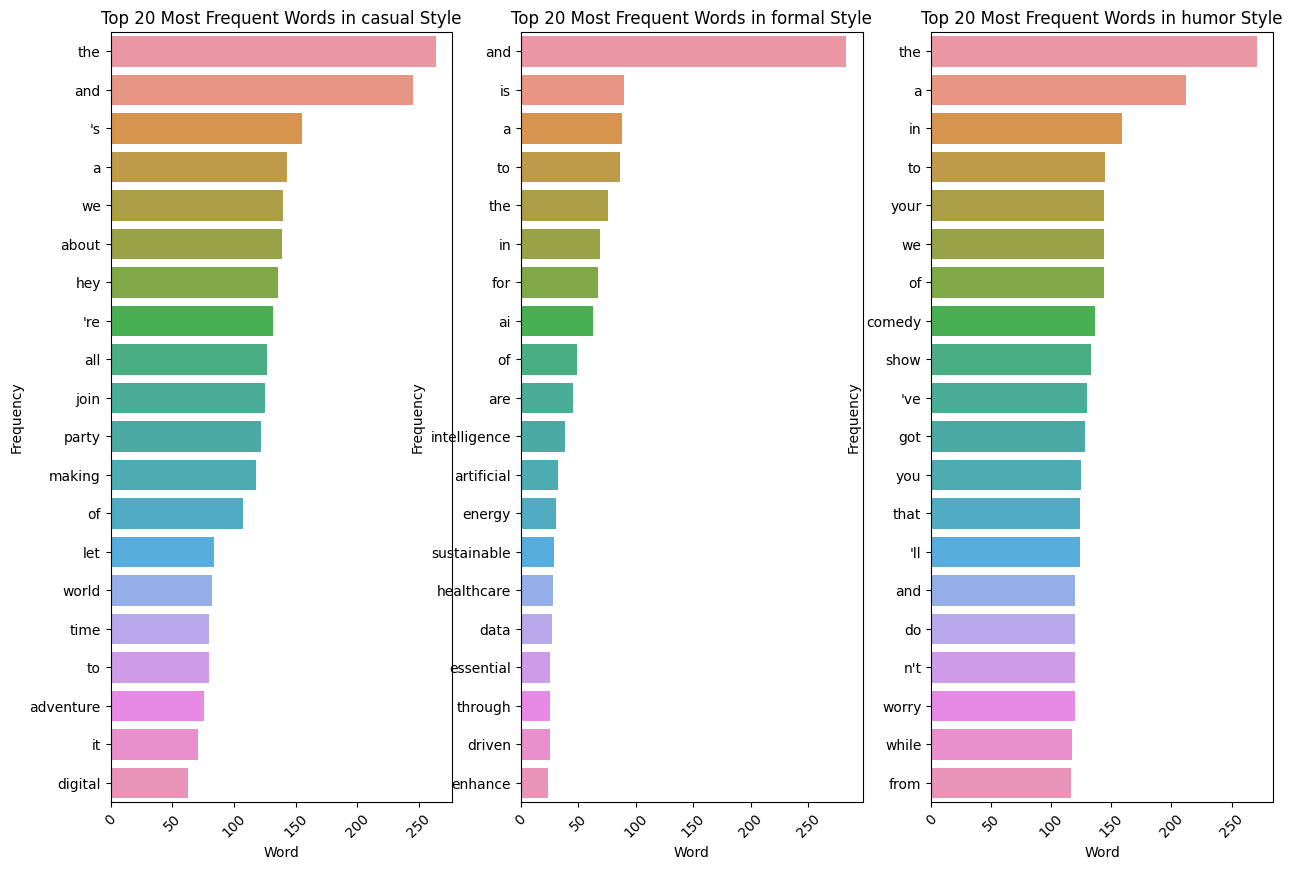

Enter the value of N (between 1 and 4) for N-gram analysis:  1


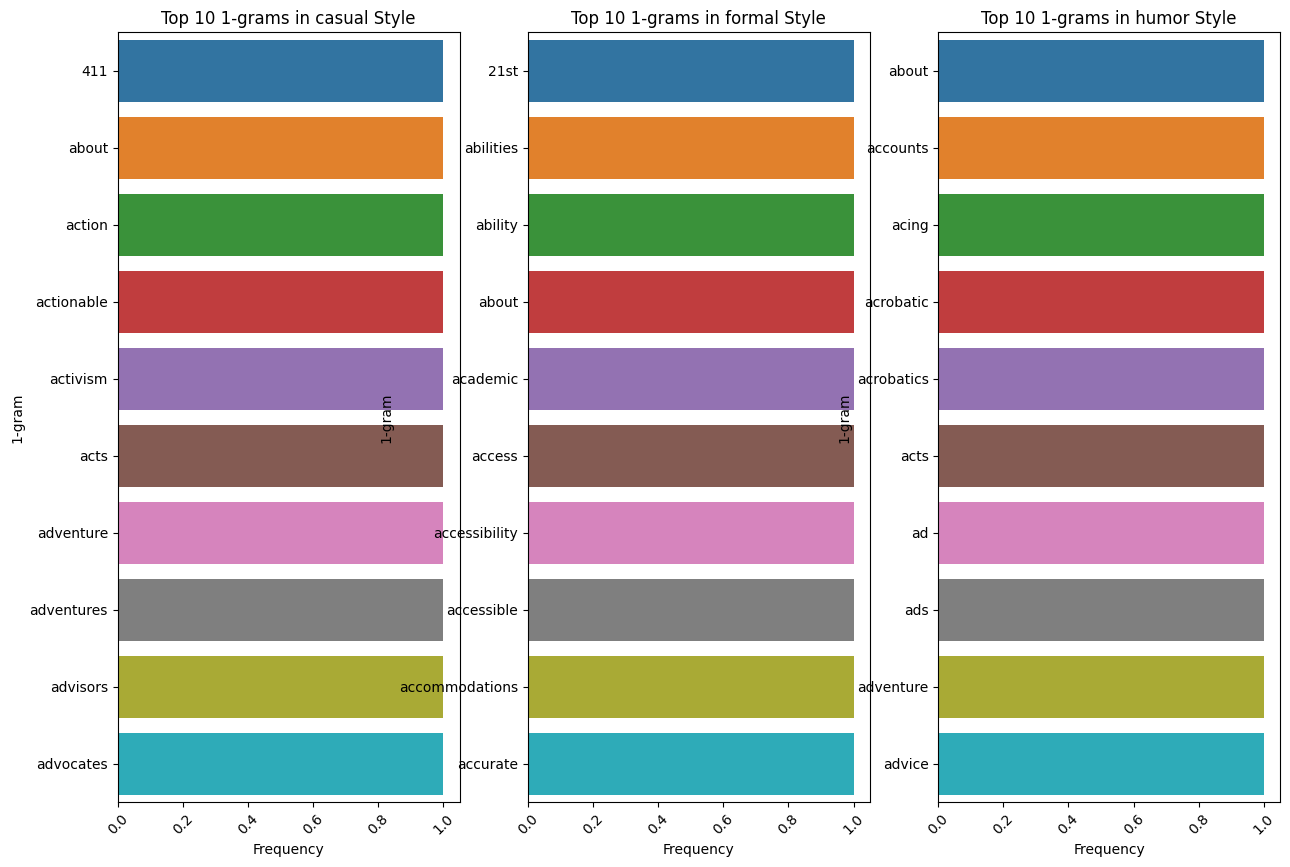

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import CountVectorizer

# Install the spaCy model if not already installed
!python -m spacy download en_core_web_sm

# Load the CSV files
csv_file_path = "/kaggle/working/seperate/"
formal_data = pd.read_csv(csv_file_path + 'formal_data.csv')
casual_data = pd.read_csv(csv_file_path + 'casual_data.csv')
humor_data = pd.read_csv(csv_file_path + 'humor_data.csv')

# Combine text from casual, formal, and humor styles
all_text = {
    "casual": ' '.join(casual_data['paragraph_casual']).lower(),
    "formal": ' '.join(formal_data['paragraph_formal']).lower(),  # Use 'paragraph_formal'
    "humor": ' '.join(humor_data['paragraph_humor']).lower()
}

# Generate word clouds for each style
plt.figure(figsize=(15, 10))
for i, style in enumerate(["casual", "formal", "humor"]):
    plt.subplot(1, 3, i + 1)
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(all_text[style])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {style} Style")

plt.show()

# Tokenization and frequency analysis for each style
plt.figure(figsize=(15, 10))
for i, style in enumerate(["casual", "formal", "humor"]):
    plt.subplot(1, 3, i + 1)
    
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(all_text[style])

    tokens = [token.text for token in doc if not token.is_punct]
    word_freq = Counter(tokens)

    common_words = word_freq.most_common(20)
    common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

    sns.barplot(x='Frequency', y='Word', data=common_words_df)
    plt.title(f"Top 20 Most Frequent Words in {style} Style")
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)

plt.show()

# N-gram analysis for each style
n_value = int(input("Enter the value of N (between 1 and 4) for N-gram analysis: "))
if n_value >= 1 and n_value <= 4:
    plt.figure(figsize=(15, 10))
    for i, style in enumerate(["casual", "formal", "humor"]):
        plt.subplot(1, 3, i + 1)

        ngram_vectorizer = CountVectorizer(ngram_range=(n_value, n_value))
        X = ngram_vectorizer.fit_transform([all_text[style]])
        ngrams = ngram_vectorizer.get_feature_names_out()

        ngram_freq = Counter(ngrams)
        top_ngrams = ngram_freq.most_common(10)
        top_ngrams_df = pd.DataFrame(top_ngrams, columns=[f'{n_value}-gram', 'Frequency'])

        sns.barplot(x='Frequency', y=f'{n_value}-gram', data=top_ngrams_df)
        plt.title(f"Top 10 {n_value}-grams in {style} Style")
        plt.xlabel("Frequency")
        plt.ylabel(f'{n_value}-gram')
        plt.xticks(rotation=45)
else:
    print("Invalid N value. Please choose a value between 1 and 4.")
plt.show()

#### 3. Preprocessing:

- Tokenize the text and apply text preprocessing steps like lowercasing, removing punctuation, and handling special characters.
- Consider using tools like spaCy or NLTK for text preprocessing.

In [9]:
import pandas as pd
import os
import re
import spacy
from nltk.corpus import stopwords

# Define the path to your CSV files
csv_file_path = "/kaggle/working/separate/"
output_dir = "/kaggle/working/processed/"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Load English stopwords from NLTK
stop_words = set(stopwords.words("english"))

# Define a function to preprocess the text
def preprocess_text(text):
    # Define custom rules for tokenization
    def custom_tokenizer(text):
        # Tokenize the text using spaCy
        doc = nlp(text)
        
        # Customize tokenization, e.g., keep only nouns and adjectives
        filtered_tokens = [token.text for token in doc if token.pos_ in ["NOUN", "ADJ"]]

        return filtered_tokens

    # Remove HTML tags and special characters
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenize the text using custom rules
    tokens = custom_tokenizer(text)

    # Remove stopwords and keep full words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Combine the preprocessed text and filtered tokens into a single string
    preprocessed_text = " ".join(filtered_tokens)

    # Additional preprocessing steps can be added here

    return preprocessed_text

# Preprocess and save formal data
formal_data = pd.read_csv(os.path.join(csv_file_path, 'formal_data.csv'))
formal_data['title_formal'] = formal_data['title_formal'].apply(lambda x: preprocess_text(x) if pd.notna(x) else "")
formal_data['paragraph_formal'] = formal_data['paragraph_formal'].apply(lambda x: preprocess_text(x) if pd.notna(x) else "")
formal_data.to_csv(os.path.join(output_dir, 'formal_data_processed.csv'), index=False)

# Preprocess and save casual data
casual_data = pd.read_csv(os.path.join(csv_file_path, 'casual_data.csv'))
casual_data['title_casual'] = casual_data['title_casual'].apply(lambda x: preprocess_text(x) if pd.notna(x) else "")
casual_data['paragraph_casual'] = casual_data['paragraph_casual'].apply(lambda x: preprocess_text(x) if pd notna(x) else "")
casual_data.to_csv(os.path.join(output_dir, 'casual_data_processed.csv'), index=False)

# Preprocess and save humor data
humor_data = pd.read_csv(os.path.join(csv_file_path, 'humor_data.csv'))
humor_data['title_humor'] = humor_data['title_humor'].apply(lambda x: preprocess_text(x) if pd.notna(x) else "")
humor_data['paragraph_humor'] = humor_data['paragraph_humor'].apply(lambda x: preprocess_text(x) if pd.notna(x) else "")
humor_data.to_csv(os.path.join(output_dir, 'humor_data_processed.csv'), index=False)

# Check if the data has been saved successfully
print("Preprocessed data saved in the 'Processed' folder.")


Preprocessed data saved in the 'Processed' folder.


#### 4. Data Splitting:

- Split the provided dataset into training, validation, and test sets.
- Ensure that the test dataset is separate from the training data to evaluate model generalization.

In [10]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV files
csv_file_path = "/kaggle/working/processed/"
formal_data = pd.read_csv(csv_file_path + 'formal_data_processed.csv')
casual_data = pd.read_csv(csv_file_path + 'casual_data_processed.csv')
humor_data = pd.read_csv(csv_file_path + 'humor_data_processed.csv')

# Define the output directory
output_dir = "/kaggle/working/"

# Create directories for train, validation, and test
os.makedirs(os.path.join(output_dir, "train"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test"), exist_ok=True)

# Split the data into training, validation, and test sets
formal_train, formal_temp, _, _ = train_test_split(formal_data, formal_data, test_size=0.2, random_state=42)
formal_val, formal_test, _, _ = train_test_split(formal_temp, formal_temp, test_size=0.5, random_state=42)

casual_train, casual_temp, _, _ = train_test_split(casual_data, casual_data, test_size=0.2, random_state=42)
casual_val, casual_test, _, _ = train_test_split(casual_temp, casual_temp, test_size=0.5, random_state=42)

humor_train, humor_temp, _, _ = train_test_split(humor_data, humor_data, test_size=0.2, random_state=42)
humor_val, humor_test, _, _ = train_test_split(humor_temp, humor_temp, test_size=0.5, random_state=42)

# Save the split datasets in the respective folders
formal_train.to_csv(os.path.join(output_dir, "train/formal_train.csv"), index=False)
formal_val.to_csv(os.path.join(output_dir, "val/formal_val.csv"), index=False)
formal_test.to_csv(os.path.join(output_dir, "test/formal_test.csv"), index=False)

casual_train.to_csv(os.path.join(output_dir, "train/casual_train.csv"), index=False)
casual_val.to_csv(os.path.join(output_dir, "val/casual_val.csv"), index=False)
casual_test.to_csv(os.path.join(output_dir, "test/casual_test.csv"), index=False)

humor_train.to_csv(os.path.join(output_dir, "train/humor_train.csv"), index=False)
humor_val.to_csv(os.path.join(output_dir, "val/humor_val.csv"), index=False)
humor_test.to_csv(os.path.join(output_dir, "test/humor_test.csv"), index=False)

print("Data splitting completed. Split datasets saved.")

Data splitting completed. Split datasets saved.


## 5. Sequence-to-Sequence Model for Text Translation

This code demonstrates a sequence-to-sequence (Seq2Seq) model for text translation using PyTorch. The Seq2Seq model is trained to translate text from a formal style to a casual style. It utilizes a custom dataset, vocabulary building, and training loop to achieve this task.

### Components of the Code

- **Data Preprocessing**: The code loads and preprocesses training data from two CSV files: formal and casual text pairs. It uses spaCy for tokenization and filters out incomplete rows.

- **Dataset Creation**: Custom datasets are defined to organize the formal and casual text pairs.

- **Vocabulary Building**: The vocabulary for the model is built by collecting unique words from both the formal and casual text data.

- **Seq2Seq Model**: The Seq2Seq model is defined, which consists of an embedding layer, an encoder LSTM, a decoder LSTM, and a linear layer for output. The model is set up for training.

- **Training Loop**: The code includes the main training loop, where the model is trained using the provided data and custom collate function. It iterates through epochs, calculating loss, and optimizing the model.

In [11]:
! pip install torch sentencepiece sacremoses torchtext==0.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 11.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 5.2 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=2bcd56c5a544647b021041b3fa14b22b299b69cc2fa83488232ac87ac48ced66
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157ee977e9e42fb
Successfully built sacremoses
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.1
    Uninstalling torchtext-0.15.1:
      Successfully uninstalled torchtext-0.15.1


In [12]:
! pip install tqdm

In [13]:
! pip install torchsummary

### GPT2

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import spacy
from sklearn.model_selection import train_test_split
import tqdm
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load a pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Check if CUDA is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the loss function (criterion)
criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)
# Define a custom dataset

class CustomDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.data = data
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Load and preprocess your data
def load_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data = [line.strip().split(',') for line in lines]
    return data

def preprocess_data(data, tokenizer):
    data = [item for item in data if len(item) == 2]  # Filter out incomplete rows
    data = [{'paragraph_formal': item[1], 'paragraph_casual': item[0]} for item in data]
    return data

formal_data = preprocess_data(load_data("train/formal_train.csv"), tokenizer)
casual_data = preprocess_data(load_data("train/casual_train.csv"), tokenizer)

# Split the data into train and validation sets
train_formal, val_formal = train_test_split(formal_data, test_size=0.2, random_state=42)
train_casual, val_casual = train_test_split(casual_data, test_size=0.2, random_state=42)

# Define collate function to tokenize and pad sequences in each batch
def custom_collate(batch, tokenizer):
    max_length = max(len(item['paragraph_casual']) for item in batch)

    input_text = [item['paragraph_casual'] for item in batch]
    input_text = [text + ' <eos>' for text in input_text]  # Add <eos> token to the end of input text
    input_text = tokenizer(input_text, padding=True, truncation=True, max_length=max_length, return_tensors="pt")
    input_text = input_text['input_ids'].to(device)

    return input_text

# Set the gradient clipping value
CLIP = 1.0

# Update your DataLoader to use the custom collate function
train_iterator = DataLoader(train_casual, batch_size=128, shuffle=True, collate_fn=lambda batch: custom_collate(batch, tokenizer))

# Main training loop
def train(model, iterator, optimizer, criterion, clip, tokenizer):
    model.train()
    epoch_loss = 0

    for batch in tqdm.tqdm(iterator):
        input_text = batch

        optimizer.zero_grad()

        output = model(input_text, return_dict=True, labels=input_text)
        loss = output.loss

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        epoch_loss += loss.item()

    return epoch_loss / len(iterator)


if __name__ == '__main__':
    model = model.to(device)
    optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=1e-4)  # Add weight decay for L2 regularization

    N_EPOCHS = 1000
    tokenizer.pad_token = '[PAD]'

    train_iterator = DataLoader(train_casual, batch_size=128, shuffle=True, collate_fn=lambda batch: custom_collate(batch, tokenizer))

    best_val_loss = float('inf')
    patience = 5
    early_stop_counter = 0

    for epoch in range(N_EPOCHS):
        train_loss = train(model, train_iterator, optimizer, criterion, CLIP, tokenizer)
        print(f'Epoch: {epoch + 1:02}')
        print(f'\tTrain Loss: {train_loss:.4f}')

        # Validation
        val_iterator = DataLoader(val_casual, batch_size=128, collate_fn=lambda batch: custom_collate(batch, tokenizer))
        val_loss = train(model, val_iterator, optimizer, criterion, CLIP, tokenizer)
        print(f'\tVal Loss: {val_loss:.4f}')

#         # Early stopping
#         if val_loss < best_val_loss:
#             best_val_loss = val_loss
#             early_stop_counter = 0
#         else:
#             early_stop_counter += 1
#             if early_stop_counter >= patience:
#                 print("Early stopping triggered. Model training stopped.")
#                 break

    # Save the trained model
    torch.save(model.state_dict(), 'gpt2_modelv2.pth')

100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


Epoch: 01
	Train Loss: 8.2050


100%|██████████| 1/1 [00:00<00:00, 13.45it/s]


	Val Loss: 7.4180


100%|██████████| 1/1 [00:00<00:00,  7.10it/s]


Epoch: 02
	Train Loss: 7.3528


100%|██████████| 1/1 [00:00<00:00, 15.04it/s]


	Val Loss: 6.6524


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 03
	Train Loss: 6.6102


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 5.8724


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 04
	Train Loss: 5.7385


100%|██████████| 1/1 [00:00<00:00, 15.06it/s]


	Val Loss: 5.1598


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 05
	Train Loss: 5.0502


100%|██████████| 1/1 [00:00<00:00, 15.06it/s]


	Val Loss: 4.3008


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 06
	Train Loss: 4.2087


100%|██████████| 1/1 [00:00<00:00, 15.44it/s]


	Val Loss: 3.7165


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 07
	Train Loss: 3.5061


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 2.9786


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 08
	Train Loss: 2.9283


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


	Val Loss: 2.3317


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 09
	Train Loss: 2.4243


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 1.8800


100%|██████████| 1/1 [00:00<00:00,  7.05it/s]


Epoch: 10
	Train Loss: 2.1016


100%|██████████| 1/1 [00:00<00:00, 13.67it/s]


	Val Loss: 1.6819


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 11
	Train Loss: 1.7474


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 1.4023


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 12
	Train Loss: 1.4981


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 1.1858


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 13
	Train Loss: 1.4153


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.9793


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 14
	Train Loss: 1.3353


100%|██████████| 1/1 [00:00<00:00, 15.47it/s]


	Val Loss: 1.0269


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 15
	Train Loss: 1.2617


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


	Val Loss: 0.7836


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 16
	Train Loss: 1.2068


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.9110


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 17
	Train Loss: 1.0722


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


	Val Loss: 0.8839


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 18
	Train Loss: 1.0660


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.6641


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 19
	Train Loss: 0.9300


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.5786


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 20
	Train Loss: 0.9297


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.8136


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 21
	Train Loss: 0.8932


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.5096


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 22
	Train Loss: 0.8295


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.6133


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 23
	Train Loss: 0.8723


100%|██████████| 1/1 [00:00<00:00, 15.49it/s]


	Val Loss: 0.4375


100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Epoch: 24
	Train Loss: 0.7111


100%|██████████| 1/1 [00:00<00:00, 15.51it/s]


	Val Loss: 0.5787


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 25
	Train Loss: 0.6995


100%|██████████| 1/1 [00:00<00:00, 15.59it/s]


	Val Loss: 0.4794


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 26
	Train Loss: 0.7193


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.6124


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 27
	Train Loss: 0.7198


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.3393


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 28
	Train Loss: 0.6682


100%|██████████| 1/1 [00:00<00:00, 15.46it/s]


	Val Loss: 0.4416


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 29
	Train Loss: 0.6605


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.4242


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 30
	Train Loss: 0.6677


100%|██████████| 1/1 [00:00<00:00, 14.94it/s]


	Val Loss: 0.3896


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 31
	Train Loss: 0.6390


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.4703


100%|██████████| 1/1 [00:00<00:00,  7.06it/s]


Epoch: 32
	Train Loss: 0.6643


100%|██████████| 1/1 [00:00<00:00, 15.46it/s]


	Val Loss: 0.3549


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 33
	Train Loss: 0.7127


100%|██████████| 1/1 [00:00<00:00, 14.95it/s]


	Val Loss: 0.2046


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 34
	Train Loss: 0.5205


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.4015


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 35
	Train Loss: 0.6037


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.3082


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 36
	Train Loss: 0.6125


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.3214


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 37
	Train Loss: 0.5645


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.2424


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 38
	Train Loss: 0.5825


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.3226


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 39
	Train Loss: 0.5394


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


	Val Loss: 0.4112


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 40
	Train Loss: 0.5258


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.4223


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 41
	Train Loss: 0.4855


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.3013


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 42
	Train Loss: 0.5126


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.3195


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 43
	Train Loss: 0.5240


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.1943


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 44
	Train Loss: 0.5116


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.1688


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 45
	Train Loss: 0.5000


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.4247


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 46
	Train Loss: 0.5099


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.2215


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 47
	Train Loss: 0.5223


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.3243


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 48
	Train Loss: 0.5317


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.2629


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 49
	Train Loss: 0.4237


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.3469


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 50
	Train Loss: 0.5316


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.2586


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 51
	Train Loss: 0.4496


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.2558


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 52
	Train Loss: 0.4696


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.3635


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 53
	Train Loss: 0.5322


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.2812


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 54
	Train Loss: 0.4484


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.3187


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 55
	Train Loss: 0.4530


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.4312


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 56
	Train Loss: 0.5273


100%|██████████| 1/1 [00:00<00:00, 14.24it/s]


	Val Loss: 0.3414


100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


Epoch: 57
	Train Loss: 0.5174


100%|██████████| 1/1 [00:00<00:00, 14.87it/s]


	Val Loss: 0.3279


100%|██████████| 1/1 [00:00<00:00,  7.09it/s]


Epoch: 58
	Train Loss: 0.4989


100%|██████████| 1/1 [00:00<00:00, 13.47it/s]


	Val Loss: 0.1862


100%|██████████| 1/1 [00:00<00:00,  6.67it/s]


Epoch: 59
	Train Loss: 0.3936


100%|██████████| 1/1 [00:00<00:00, 14.58it/s]


	Val Loss: 0.2444


100%|██████████| 1/1 [00:00<00:00,  6.85it/s]


Epoch: 60
	Train Loss: 0.4393


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.3121


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 61
	Train Loss: 0.4237


100%|██████████| 1/1 [00:00<00:00, 14.95it/s]


	Val Loss: 0.2188


100%|██████████| 1/1 [00:00<00:00,  7.03it/s]


Epoch: 62
	Train Loss: 0.4478


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.2203


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 63
	Train Loss: 0.4878


100%|██████████| 1/1 [00:00<00:00, 15.12it/s]


	Val Loss: 0.2883


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 64
	Train Loss: 0.3368


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.5459


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 65
	Train Loss: 0.4140


100%|██████████| 1/1 [00:00<00:00, 15.04it/s]


	Val Loss: 0.2525


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 66
	Train Loss: 0.4362


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.3564


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 67
	Train Loss: 0.4073


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.1963


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 68
	Train Loss: 0.5161


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.2133


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 69
	Train Loss: 0.4063


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.3396


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 70
	Train Loss: 0.4792


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.3321


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 71
	Train Loss: 0.3912


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 0.3197


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 72
	Train Loss: 0.4418


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.3723


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 73
	Train Loss: 0.3524


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.2495


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 74
	Train Loss: 0.4820


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


	Val Loss: 0.3394


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 75
	Train Loss: 0.4095


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.4623


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 76
	Train Loss: 0.4066


100%|██████████| 1/1 [00:00<00:00, 15.43it/s]


	Val Loss: 0.3222


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 77
	Train Loss: 0.3661


100%|██████████| 1/1 [00:00<00:00, 15.52it/s]


	Val Loss: 0.1887


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 78
	Train Loss: 0.4713


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.2918


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 79
	Train Loss: 0.4045


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.1847


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 80
	Train Loss: 0.4617


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.2684


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 81
	Train Loss: 0.3553


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.2908


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 82
	Train Loss: 0.4373


100%|██████████| 1/1 [00:00<00:00, 14.77it/s]


	Val Loss: 0.2977


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 83
	Train Loss: 0.4143


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


	Val Loss: 0.2250


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 84
	Train Loss: 0.4095


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.2617


100%|██████████| 1/1 [00:00<00:00,  7.07it/s]


Epoch: 85
	Train Loss: 0.3684


100%|██████████| 1/1 [00:00<00:00, 15.03it/s]


	Val Loss: 0.2238


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 86
	Train Loss: 0.3908


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.3680


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 87
	Train Loss: 0.3869


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.3154


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 88
	Train Loss: 0.4237


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.1924


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 89
	Train Loss: 0.4131


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.4309


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 90
	Train Loss: 0.3679


100%|██████████| 1/1 [00:00<00:00, 15.12it/s]


	Val Loss: 0.3664


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 91
	Train Loss: 0.3952


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.1685


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 92
	Train Loss: 0.4126


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.2230


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 93
	Train Loss: 0.3230


100%|██████████| 1/1 [00:00<00:00, 15.12it/s]


	Val Loss: 0.2385


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 94
	Train Loss: 0.3877


100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


	Val Loss: 0.3289


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 95
	Train Loss: 0.4661


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.3790


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 96
	Train Loss: 0.5238


100%|██████████| 1/1 [00:00<00:00, 15.40it/s]


	Val Loss: 0.4287


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 97
	Train Loss: 0.4374


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.3180


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 98
	Train Loss: 0.3683


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.2794


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 99
	Train Loss: 0.4205


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.4267


100%|██████████| 1/1 [00:00<00:00,  7.10it/s]


Epoch: 100
	Train Loss: 0.5068


100%|██████████| 1/1 [00:00<00:00, 15.01it/s]


	Val Loss: 0.3016


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 101
	Train Loss: 0.4260


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.2044


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 102
	Train Loss: 0.4324


100%|██████████| 1/1 [00:00<00:00, 14.22it/s]


	Val Loss: 0.1909


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 103
	Train Loss: 0.4411


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.3618


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 104
	Train Loss: 0.3947


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.2536


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 105
	Train Loss: 0.4252


100%|██████████| 1/1 [00:00<00:00, 15.04it/s]


	Val Loss: 0.4074


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 106
	Train Loss: 0.4361


100%|██████████| 1/1 [00:00<00:00, 15.03it/s]


	Val Loss: 0.2469


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 107
	Train Loss: 0.3868


100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


	Val Loss: 0.3345


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 108
	Train Loss: 0.3316


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.3208


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 109
	Train Loss: 0.3885


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.3317


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 110
	Train Loss: 0.4007


100%|██████████| 1/1 [00:00<00:00, 15.41it/s]


	Val Loss: 0.3004


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 111
	Train Loss: 0.4888


100%|██████████| 1/1 [00:00<00:00, 14.99it/s]


	Val Loss: 0.5044


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 112
	Train Loss: 0.3019


100%|██████████| 1/1 [00:00<00:00, 14.91it/s]


	Val Loss: 0.3084


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 113
	Train Loss: 0.3021


100%|██████████| 1/1 [00:00<00:00, 15.01it/s]


	Val Loss: 0.1889


100%|██████████| 1/1 [00:00<00:00,  7.06it/s]


Epoch: 114
	Train Loss: 0.3937


100%|██████████| 1/1 [00:00<00:00, 14.76it/s]


	Val Loss: 0.2474


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 115
	Train Loss: 0.3233


100%|██████████| 1/1 [00:00<00:00, 15.04it/s]


	Val Loss: 0.1951


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 116
	Train Loss: 0.4868


100%|██████████| 1/1 [00:00<00:00, 15.04it/s]


	Val Loss: 0.3038


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 117
	Train Loss: 0.3919


100%|██████████| 1/1 [00:00<00:00, 14.95it/s]


	Val Loss: 0.5040


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 118
	Train Loss: 0.3674


100%|██████████| 1/1 [00:00<00:00, 14.83it/s]


	Val Loss: 0.3163


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 119
	Train Loss: 0.3814


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.3636


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 120
	Train Loss: 0.3568


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.1737


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 121
	Train Loss: 0.4048


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.1609


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 122
	Train Loss: 0.2952


100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


	Val Loss: 0.4381


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 123
	Train Loss: 0.3752


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.3808


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 124
	Train Loss: 0.3355


100%|██████████| 1/1 [00:00<00:00, 15.12it/s]


	Val Loss: 0.3100


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 125
	Train Loss: 0.3256


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.2504


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 126
	Train Loss: 0.3153


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.2721


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 127
	Train Loss: 0.3908


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.3137


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 128
	Train Loss: 0.4306


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.2600


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 129
	Train Loss: 0.3473


100%|██████████| 1/1 [00:00<00:00, 14.94it/s]


	Val Loss: 0.2951


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 130
	Train Loss: 0.3848


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.2867


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 131
	Train Loss: 0.3878


100%|██████████| 1/1 [00:00<00:00, 13.52it/s]


	Val Loss: 0.1911


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 132
	Train Loss: 0.3289


100%|██████████| 1/1 [00:00<00:00, 14.88it/s]


	Val Loss: 0.2593


100%|██████████| 1/1 [00:00<00:00,  6.98it/s]


Epoch: 133
	Train Loss: 0.3693


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.2209


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 134
	Train Loss: 0.4553


100%|██████████| 1/1 [00:00<00:00, 14.58it/s]


	Val Loss: 0.3927


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 135
	Train Loss: 0.3159


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.2705


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 136
	Train Loss: 0.3821


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.2509


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 137
	Train Loss: 0.4302


100%|██████████| 1/1 [00:00<00:00, 15.43it/s]


	Val Loss: 0.2777


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 138
	Train Loss: 0.3348


100%|██████████| 1/1 [00:00<00:00, 15.40it/s]


	Val Loss: 0.4420


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 139
	Train Loss: 0.3485


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.2776


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 140
	Train Loss: 0.4098


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.2933


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 141
	Train Loss: 0.3675


100%|██████████| 1/1 [00:00<00:00, 15.40it/s]


	Val Loss: 0.2962


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 142
	Train Loss: 0.3764


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.3311


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 143
	Train Loss: 0.3472


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.2608


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 144
	Train Loss: 0.3599


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


	Val Loss: 0.3563


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 145
	Train Loss: 0.4757


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.3599


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 146
	Train Loss: 0.3931


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.2540


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 147
	Train Loss: 0.3349


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 0.2502


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 148
	Train Loss: 0.3372


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.2560


100%|██████████| 1/1 [00:00<00:00,  7.10it/s]


Epoch: 149
	Train Loss: 0.3679


100%|██████████| 1/1 [00:00<00:00, 15.04it/s]


	Val Loss: 0.2894


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 150
	Train Loss: 0.3647


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.2179


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 151
	Train Loss: 0.3410


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.2084


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 152
	Train Loss: 0.3468


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.3507


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 153
	Train Loss: 0.3546


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.4632


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 154
	Train Loss: 0.3581


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.3234


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 155
	Train Loss: 0.4065


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.3757


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 156
	Train Loss: 0.4529


100%|██████████| 1/1 [00:00<00:00, 14.99it/s]


	Val Loss: 0.2048


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 157
	Train Loss: 0.3852


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.3534


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 158
	Train Loss: 0.3811


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.1308


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 159
	Train Loss: 0.3350


100%|██████████| 1/1 [00:00<00:00, 15.48it/s]


	Val Loss: 0.1893


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 160
	Train Loss: 0.4145


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.2399


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 161
	Train Loss: 0.3715


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.1906


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 162
	Train Loss: 0.3974


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.3107


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 163
	Train Loss: 0.3641


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.3948


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 164
	Train Loss: 0.3468


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.4419


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 165
	Train Loss: 0.3484


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.3670


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 166
	Train Loss: 0.3388


100%|██████████| 1/1 [00:00<00:00, 15.45it/s]


	Val Loss: 0.1547


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 167
	Train Loss: 0.3869


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.2823


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 168
	Train Loss: 0.3289


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.3077


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 169
	Train Loss: 0.3612


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.2644


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 170
	Train Loss: 0.3596


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.2612


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 171
	Train Loss: 0.3686


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.3582


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 172
	Train Loss: 0.3341


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.2926


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 173
	Train Loss: 0.3649


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.3047


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 174
	Train Loss: 0.3777


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.2834


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 175
	Train Loss: 0.3685


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.3651


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 176
	Train Loss: 0.3274


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.2607


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 177
	Train Loss: 0.3636


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.1553


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 178
	Train Loss: 0.3901


100%|██████████| 1/1 [00:00<00:00, 15.63it/s]


	Val Loss: 0.2598


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 179
	Train Loss: 0.4345


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.4257


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 180
	Train Loss: 0.3825


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.2464


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 181
	Train Loss: 0.2695


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.2126


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 182
	Train Loss: 0.3344


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.2314


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 183
	Train Loss: 0.3342


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.2466


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 184
	Train Loss: 0.3542


100%|██████████| 1/1 [00:00<00:00, 15.54it/s]


	Val Loss: 0.3120


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 185
	Train Loss: 0.3094


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.3566


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 186
	Train Loss: 0.3221


100%|██████████| 1/1 [00:00<00:00, 15.49it/s]


	Val Loss: 0.3038


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 187
	Train Loss: 0.3236


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.2556


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 188
	Train Loss: 0.3471


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.2119


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 189
	Train Loss: 0.3529


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.1967


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 190
	Train Loss: 0.3536


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.2660


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 191
	Train Loss: 0.2278


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.1961


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 192
	Train Loss: 0.3288


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.1210


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 193
	Train Loss: 0.3222


100%|██████████| 1/1 [00:00<00:00, 15.00it/s]


	Val Loss: 0.1711


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 194
	Train Loss: 0.3762


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.2464


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 195
	Train Loss: 0.3542


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.2514


100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


Epoch: 196
	Train Loss: 0.3258


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.1789


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 197
	Train Loss: 0.3152


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.2929


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 198
	Train Loss: 0.3121


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.2425


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 199
	Train Loss: 0.3754


100%|██████████| 1/1 [00:00<00:00, 15.41it/s]


	Val Loss: 0.3130


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 200
	Train Loss: 0.3720


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.2037


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 201
	Train Loss: 0.3676


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.2483


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 202
	Train Loss: 0.3667


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.2048


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 203
	Train Loss: 0.3742


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.1570


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 204
	Train Loss: 0.3222


100%|██████████| 1/1 [00:00<00:00, 15.60it/s]


	Val Loss: 0.1915


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 205
	Train Loss: 0.3405


100%|██████████| 1/1 [00:00<00:00, 15.54it/s]


	Val Loss: 0.3101


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 206
	Train Loss: 0.3716


100%|██████████| 1/1 [00:00<00:00, 15.46it/s]


	Val Loss: 0.1548


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 207
	Train Loss: 0.3154


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.1896


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 208
	Train Loss: 0.3424


100%|██████████| 1/1 [00:00<00:00, 15.52it/s]


	Val Loss: 0.1683


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 209
	Train Loss: 0.3430


100%|██████████| 1/1 [00:00<00:00, 15.48it/s]


	Val Loss: 0.1924


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 210
	Train Loss: 0.3818


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.1810


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 211
	Train Loss: 0.3409


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.2110


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 212
	Train Loss: 0.3011


100%|██████████| 1/1 [00:00<00:00, 15.52it/s]


	Val Loss: 0.1711


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 213
	Train Loss: 0.3178


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.1614


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 214
	Train Loss: 0.2870


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.3623


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 215
	Train Loss: 0.3910


100%|██████████| 1/1 [00:00<00:00, 15.44it/s]


	Val Loss: 0.2284


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 216
	Train Loss: 0.3403


100%|██████████| 1/1 [00:00<00:00, 15.47it/s]


	Val Loss: 0.1862


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 217
	Train Loss: 0.3807


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.2786


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 218
	Train Loss: 0.3210


100%|██████████| 1/1 [00:00<00:00, 14.97it/s]


	Val Loss: 0.2219


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 219
	Train Loss: 0.3530


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.2270


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 220
	Train Loss: 0.3000


100%|██████████| 1/1 [00:00<00:00, 14.96it/s]


	Val Loss: 0.1752


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 221
	Train Loss: 0.2946


100%|██████████| 1/1 [00:00<00:00, 15.02it/s]


	Val Loss: 0.3136


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 222
	Train Loss: 0.2819


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.2235


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 223
	Train Loss: 0.3458


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.2172


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 224
	Train Loss: 0.3557


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 0.1325


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 225
	Train Loss: 0.3205


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.2370


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 226
	Train Loss: 0.3244


100%|██████████| 1/1 [00:00<00:00, 15.01it/s]


	Val Loss: 0.1712


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 227
	Train Loss: 0.2643


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.2891


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 228
	Train Loss: 0.3361


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 0.2483


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 229
	Train Loss: 0.3066


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.1301


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 230
	Train Loss: 0.3121


100%|██████████| 1/1 [00:00<00:00, 15.02it/s]


	Val Loss: 0.2765


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 231
	Train Loss: 0.2850


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.1675


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 232
	Train Loss: 0.3038


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.2688


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 233
	Train Loss: 0.3446


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.2597


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 234
	Train Loss: 0.2973


100%|██████████| 1/1 [00:00<00:00, 15.04it/s]


	Val Loss: 0.1888


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 235
	Train Loss: 0.3310


100%|██████████| 1/1 [00:00<00:00, 14.71it/s]


	Val Loss: 0.2770


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 236
	Train Loss: 0.3118


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.1880


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 237
	Train Loss: 0.2689


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.1146


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 238
	Train Loss: 0.2730


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.2046


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 239
	Train Loss: 0.2882


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.2504


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 240
	Train Loss: 0.2865


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.1521


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 241
	Train Loss: 0.2786


100%|██████████| 1/1 [00:00<00:00, 15.12it/s]


	Val Loss: 0.2049


100%|██████████| 1/1 [00:00<00:00,  6.91it/s]


Epoch: 242
	Train Loss: 0.2963


100%|██████████| 1/1 [00:00<00:00, 13.66it/s]


	Val Loss: 0.1617


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 243
	Train Loss: 0.2977


100%|██████████| 1/1 [00:00<00:00, 14.96it/s]


	Val Loss: 0.2293


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 244
	Train Loss: 0.2854


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.2131


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 245
	Train Loss: 0.3050


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.1125


100%|██████████| 1/1 [00:00<00:00,  7.03it/s]


Epoch: 246
	Train Loss: 0.2405


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


	Val Loss: 0.2079


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 247
	Train Loss: 0.2567


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.1817


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 248
	Train Loss: 0.3589


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.3322


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 249
	Train Loss: 0.2969


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.2826


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 250
	Train Loss: 0.3400


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 0.2135


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 251
	Train Loss: 0.3402


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.1467


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 252
	Train Loss: 0.3322


100%|██████████| 1/1 [00:00<00:00, 15.12it/s]


	Val Loss: 0.1743


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 253
	Train Loss: 0.2706


100%|██████████| 1/1 [00:00<00:00, 15.03it/s]


	Val Loss: 0.2668


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 254
	Train Loss: 0.3084


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.0974


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 255
	Train Loss: 0.3585


100%|██████████| 1/1 [00:00<00:00, 14.85it/s]


	Val Loss: 0.1981


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 256
	Train Loss: 0.3081


100%|██████████| 1/1 [00:00<00:00, 14.67it/s]


	Val Loss: 0.1681


100%|██████████| 1/1 [00:00<00:00,  7.09it/s]


Epoch: 257
	Train Loss: 0.3047


100%|██████████| 1/1 [00:00<00:00, 14.87it/s]


	Val Loss: 0.2030


100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Epoch: 258
	Train Loss: 0.3262


100%|██████████| 1/1 [00:00<00:00, 14.36it/s]


	Val Loss: 0.1756


100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Epoch: 259
	Train Loss: 0.2883


100%|██████████| 1/1 [00:00<00:00, 14.81it/s]


	Val Loss: 0.2316


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 260
	Train Loss: 0.3144


100%|██████████| 1/1 [00:00<00:00, 14.89it/s]


	Val Loss: 0.3222


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 261
	Train Loss: 0.3556


100%|██████████| 1/1 [00:00<00:00, 14.92it/s]


	Val Loss: 0.2524


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 262
	Train Loss: 0.2727


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.1346


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 263
	Train Loss: 0.2995


100%|██████████| 1/1 [00:00<00:00, 15.00it/s]


	Val Loss: 0.2009


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 264
	Train Loss: 0.2655


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.1332


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 265
	Train Loss: 0.3663


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.2342


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 266
	Train Loss: 0.3023


100%|██████████| 1/1 [00:00<00:00, 15.00it/s]


	Val Loss: 0.3021


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 267
	Train Loss: 0.3192


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.2840


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 268
	Train Loss: 0.3074


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 0.1614


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 269
	Train Loss: 0.2870


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.1589


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 270
	Train Loss: 0.2698


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.2276


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 271
	Train Loss: 0.3211


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 0.3117


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 272
	Train Loss: 0.3142


100%|██████████| 1/1 [00:00<00:00, 14.63it/s]


	Val Loss: 0.2000


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 273
	Train Loss: 0.3156


100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


	Val Loss: 0.2434


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 274
	Train Loss: 0.3067


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.1166


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 275
	Train Loss: 0.2605


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.2312


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 276
	Train Loss: 0.2549


100%|██████████| 1/1 [00:00<00:00, 14.72it/s]


	Val Loss: 0.1972


100%|██████████| 1/1 [00:00<00:00,  6.78it/s]


Epoch: 277
	Train Loss: 0.3259


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.2524


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 278
	Train Loss: 0.2721


100%|██████████| 1/1 [00:00<00:00, 14.34it/s]


	Val Loss: 0.2094


100%|██████████| 1/1 [00:00<00:00,  7.01it/s]


Epoch: 279
	Train Loss: 0.2693


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.2384


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 280
	Train Loss: 0.2907


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.2354


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 281
	Train Loss: 0.2636


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.1760


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 282
	Train Loss: 0.3325


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.3105


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 283
	Train Loss: 0.2897


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.2572


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 284
	Train Loss: 0.3252


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.1777


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 285
	Train Loss: 0.2947


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.3401


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 286
	Train Loss: 0.3174


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.1641


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 287
	Train Loss: 0.2809


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.2368


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 288
	Train Loss: 0.3098


100%|██████████| 1/1 [00:00<00:00, 13.47it/s]


	Val Loss: 0.1271


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 289
	Train Loss: 0.2351


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.1600


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 290
	Train Loss: 0.2896


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.1177


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 291
	Train Loss: 0.3062


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.2629


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 292
	Train Loss: 0.2522


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.1933


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 293
	Train Loss: 0.2377


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.2343


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 294
	Train Loss: 0.3513


100%|██████████| 1/1 [00:00<00:00, 14.77it/s]


	Val Loss: 0.1538


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 295
	Train Loss: 0.3217


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


	Val Loss: 0.1364


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 296
	Train Loss: 0.2731


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.2127


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 297
	Train Loss: 0.3028


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.2047


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 298
	Train Loss: 0.3099


100%|██████████| 1/1 [00:00<00:00, 15.40it/s]


	Val Loss: 0.2406


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 299
	Train Loss: 0.3368


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.2377


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 300
	Train Loss: 0.2651


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.2998


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 301
	Train Loss: 0.3019


100%|██████████| 1/1 [00:00<00:00, 15.03it/s]


	Val Loss: 0.1416


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 302
	Train Loss: 0.2653


100%|██████████| 1/1 [00:00<00:00, 15.00it/s]


	Val Loss: 0.2387


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 303
	Train Loss: 0.2576


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.2329


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 304
	Train Loss: 0.3290


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.2153


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 305
	Train Loss: 0.2810


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.2074


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 306
	Train Loss: 0.2779


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.2794


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 307
	Train Loss: 0.2695


100%|██████████| 1/1 [00:00<00:00, 14.90it/s]


	Val Loss: 0.1731


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 308
	Train Loss: 0.2573


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.1662


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 309
	Train Loss: 0.3069


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.1527


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 310
	Train Loss: 0.2834


100%|██████████| 1/1 [00:00<00:00, 15.00it/s]


	Val Loss: 0.3083


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 311
	Train Loss: 0.3153


100%|██████████| 1/1 [00:00<00:00, 15.06it/s]


	Val Loss: 0.2285


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 312
	Train Loss: 0.3001


100%|██████████| 1/1 [00:00<00:00, 15.02it/s]


	Val Loss: 0.1881


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 313
	Train Loss: 0.2955


100%|██████████| 1/1 [00:00<00:00, 14.73it/s]


	Val Loss: 0.1750


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 314
	Train Loss: 0.3121


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.1741


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 315
	Train Loss: 0.2889


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.2089


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 316
	Train Loss: 0.2736


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.2039


100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Epoch: 317
	Train Loss: 0.2459


100%|██████████| 1/1 [00:00<00:00, 15.59it/s]


	Val Loss: 0.1669


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 318
	Train Loss: 0.2654


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.2260


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 319
	Train Loss: 0.3018


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.1852


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 320
	Train Loss: 0.2592


100%|██████████| 1/1 [00:00<00:00, 15.41it/s]


	Val Loss: 0.1972


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 321
	Train Loss: 0.2592


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


	Val Loss: 0.2361


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 322
	Train Loss: 0.2305


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.1682


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 323
	Train Loss: 0.3051


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.1499


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 324
	Train Loss: 0.2524


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.1403


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 325
	Train Loss: 0.2743


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.2093


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 326
	Train Loss: 0.2868


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.1417


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 327
	Train Loss: 0.2653


100%|██████████| 1/1 [00:00<00:00, 15.03it/s]


	Val Loss: 0.1899


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 328
	Train Loss: 0.2571


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.1306


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 329
	Train Loss: 0.2571


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.1478


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 330
	Train Loss: 0.3214


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.2309


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 331
	Train Loss: 0.2538


100%|██████████| 1/1 [00:00<00:00, 15.04it/s]


	Val Loss: 0.1751


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 332
	Train Loss: 0.2764


100%|██████████| 1/1 [00:00<00:00, 15.06it/s]


	Val Loss: 0.1807


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 333
	Train Loss: 0.2606


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.1749


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 334
	Train Loss: 0.2903


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.1981


100%|██████████| 1/1 [00:00<00:00,  7.05it/s]


Epoch: 335
	Train Loss: 0.2765


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.1653


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 336
	Train Loss: 0.3192


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.1174


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 337
	Train Loss: 0.3026


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.1609


100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Epoch: 338
	Train Loss: 0.2787


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.1890


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 339
	Train Loss: 0.2869


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.1021


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 340
	Train Loss: 0.2521


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.1773


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 341
	Train Loss: 0.3000


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.1156


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 342
	Train Loss: 0.2357


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.1356


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 343
	Train Loss: 0.2836


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.1178


100%|██████████| 1/1 [00:00<00:00,  7.31it/s]


Epoch: 344
	Train Loss: 0.2872


100%|██████████| 1/1 [00:00<00:00, 15.54it/s]


	Val Loss: 0.1927


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 345
	Train Loss: 0.3103


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.1413


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 346
	Train Loss: 0.3013


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


	Val Loss: 0.1984


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 347
	Train Loss: 0.2681


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.1479


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 348
	Train Loss: 0.2748


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.1326


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 349
	Train Loss: 0.2910


100%|██████████| 1/1 [00:00<00:00, 14.95it/s]


	Val Loss: 0.1599


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 350
	Train Loss: 0.2579


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.2163


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 351
	Train Loss: 0.3032


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.1380


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 352
	Train Loss: 0.2529


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.1507


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 353
	Train Loss: 0.2531


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.1138


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 354
	Train Loss: 0.2577


100%|██████████| 1/1 [00:00<00:00, 15.41it/s]


	Val Loss: 0.1888


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 355
	Train Loss: 0.2846


100%|██████████| 1/1 [00:00<00:00, 15.40it/s]


	Val Loss: 0.1703


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 356
	Train Loss: 0.2835


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


	Val Loss: 0.2219


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 357
	Train Loss: 0.2835


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.2565


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 358
	Train Loss: 0.2603


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


	Val Loss: 0.1799


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 359
	Train Loss: 0.3014


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.1629


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 360
	Train Loss: 0.2747


100%|██████████| 1/1 [00:00<00:00, 15.52it/s]


	Val Loss: 0.1654


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 361
	Train Loss: 0.2761


100%|██████████| 1/1 [00:00<00:00, 15.12it/s]


	Val Loss: 0.1375


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 362
	Train Loss: 0.2506


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.1342


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 363
	Train Loss: 0.2583


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.1338


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 364
	Train Loss: 0.2408


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.1080


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 365
	Train Loss: 0.3270


100%|██████████| 1/1 [00:00<00:00, 15.49it/s]


	Val Loss: 0.1374


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 366
	Train Loss: 0.2387


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.1914


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 367
	Train Loss: 0.2790


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.1830


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 368
	Train Loss: 0.2173


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.1169


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 369
	Train Loss: 0.2498


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.1577


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 370
	Train Loss: 0.2293


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.2202


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 371
	Train Loss: 0.2538


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.1699


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 372
	Train Loss: 0.2591


100%|██████████| 1/1 [00:00<00:00, 15.56it/s]


	Val Loss: 0.1628


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 373
	Train Loss: 0.2811


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.0901


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 374
	Train Loss: 0.2645


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.1516


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 375
	Train Loss: 0.2362


100%|██████████| 1/1 [00:00<00:00, 14.97it/s]


	Val Loss: 0.2000


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 376
	Train Loss: 0.3068


100%|██████████| 1/1 [00:00<00:00, 14.95it/s]


	Val Loss: 0.0967


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 377
	Train Loss: 0.2711


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.1130


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 378
	Train Loss: 0.2406


100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


	Val Loss: 0.1192


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 379
	Train Loss: 0.2686


100%|██████████| 1/1 [00:00<00:00, 15.02it/s]


	Val Loss: 0.1350


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 380
	Train Loss: 0.2713


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.1104


100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Epoch: 381
	Train Loss: 0.2293


100%|██████████| 1/1 [00:00<00:00, 13.53it/s]


	Val Loss: 0.1568


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 382
	Train Loss: 0.2587


100%|██████████| 1/1 [00:00<00:00, 15.41it/s]


	Val Loss: 0.1564


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 383
	Train Loss: 0.2180


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.1538


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 384
	Train Loss: 0.2296


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.1212


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 385
	Train Loss: 0.2519


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.1170


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 386
	Train Loss: 0.2272


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.1267


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 387
	Train Loss: 0.2577


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.1274


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 388
	Train Loss: 0.2540


100%|██████████| 1/1 [00:00<00:00, 15.03it/s]


	Val Loss: 0.1445


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 389
	Train Loss: 0.2387


100%|██████████| 1/1 [00:00<00:00, 15.06it/s]


	Val Loss: 0.0933


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 390
	Train Loss: 0.2315


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.1231


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 391
	Train Loss: 0.2254


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.1115


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 392
	Train Loss: 0.2304


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.1377


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 393
	Train Loss: 0.2248


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.1194


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 394
	Train Loss: 0.2253


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.1888


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 395
	Train Loss: 0.2049


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.1614


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 396
	Train Loss: 0.2843


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.1146


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 397
	Train Loss: 0.2125


100%|██████████| 1/1 [00:00<00:00, 15.12it/s]


	Val Loss: 0.1224


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 398
	Train Loss: 0.2143


100%|██████████| 1/1 [00:00<00:00, 14.99it/s]


	Val Loss: 0.1557


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 399
	Train Loss: 0.2361


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.1212


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 400
	Train Loss: 0.2613


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.1066


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 401
	Train Loss: 0.2125


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.1195


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 402
	Train Loss: 0.2312


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.1216


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 403
	Train Loss: 0.2306


100%|██████████| 1/1 [00:00<00:00, 15.50it/s]


	Val Loss: 0.1607


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 404
	Train Loss: 0.2086


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.1186


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 405
	Train Loss: 0.2245


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0996


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 406
	Train Loss: 0.2096


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.2152


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 407
	Train Loss: 0.2414


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.1439


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 408
	Train Loss: 0.2140


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.1222


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 409
	Train Loss: 0.2267


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.1073


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 410
	Train Loss: 0.2276


100%|██████████| 1/1 [00:00<00:00, 15.48it/s]


	Val Loss: 0.1278


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 411
	Train Loss: 0.2807


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


	Val Loss: 0.1467


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 412
	Train Loss: 0.2216


100%|██████████| 1/1 [00:00<00:00, 15.45it/s]


	Val Loss: 0.0908


100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Epoch: 413
	Train Loss: 0.2337


100%|██████████| 1/1 [00:00<00:00, 15.51it/s]


	Val Loss: 0.1338


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 414
	Train Loss: 0.2554


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.1041


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 415
	Train Loss: 0.2509


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.2067


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 416
	Train Loss: 0.2379


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.0856


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 417
	Train Loss: 0.2561


100%|██████████| 1/1 [00:00<00:00, 15.55it/s]


	Val Loss: 0.0919


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 418
	Train Loss: 0.2129


100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


	Val Loss: 0.0994


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 419
	Train Loss: 0.2374


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 0.0842


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 420
	Train Loss: 0.2239


100%|██████████| 1/1 [00:00<00:00, 14.85it/s]


	Val Loss: 0.1036


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 421
	Train Loss: 0.2454


100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


	Val Loss: 0.0905


100%|██████████| 1/1 [00:00<00:00,  6.90it/s]


Epoch: 422
	Train Loss: 0.2430


100%|██████████| 1/1 [00:00<00:00, 14.90it/s]


	Val Loss: 0.0980


100%|██████████| 1/1 [00:00<00:00,  6.99it/s]


Epoch: 423
	Train Loss: 0.2163


100%|██████████| 1/1 [00:00<00:00, 14.42it/s]


	Val Loss: 0.1535


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 424
	Train Loss: 0.2347


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.1211


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 425
	Train Loss: 0.2042


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.1448


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 426
	Train Loss: 0.2333


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.1126


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 427
	Train Loss: 0.2327


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.1365


100%|██████████| 1/1 [00:00<00:00,  6.91it/s]


Epoch: 428
	Train Loss: 0.2289


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.1110


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 429
	Train Loss: 0.2106


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.1362


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 430
	Train Loss: 0.2232


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.1046


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 431
	Train Loss: 0.2375


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.1461


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 432
	Train Loss: 0.2203


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.0980


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 433
	Train Loss: 0.2255


100%|██████████| 1/1 [00:00<00:00, 14.54it/s]


	Val Loss: 0.1008


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 434
	Train Loss: 0.2287


100%|██████████| 1/1 [00:00<00:00, 14.85it/s]


	Val Loss: 0.1061


100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Epoch: 435
	Train Loss: 0.2076


100%|██████████| 1/1 [00:00<00:00, 14.53it/s]


	Val Loss: 0.0998


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 436
	Train Loss: 0.2058


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.1193


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 437
	Train Loss: 0.2205


100%|██████████| 1/1 [00:00<00:00, 14.99it/s]


	Val Loss: 0.0916


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 438
	Train Loss: 0.1995


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.1105


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 439
	Train Loss: 0.2413


100%|██████████| 1/1 [00:00<00:00, 15.52it/s]


	Val Loss: 0.1167


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 440
	Train Loss: 0.2181


100%|██████████| 1/1 [00:00<00:00, 14.97it/s]


	Val Loss: 0.1137


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 441
	Train Loss: 0.2109


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.1127


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 442
	Train Loss: 0.2177


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.0982


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 443
	Train Loss: 0.2215


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.1262


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 444
	Train Loss: 0.2075


100%|██████████| 1/1 [00:00<00:00, 15.53it/s]


	Val Loss: 0.1211


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 445
	Train Loss: 0.2215


100%|██████████| 1/1 [00:00<00:00, 15.58it/s]


	Val Loss: 0.1353


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 446
	Train Loss: 0.2132


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.0941


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 447
	Train Loss: 0.2222


100%|██████████| 1/1 [00:00<00:00, 15.46it/s]


	Val Loss: 0.0901


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 448
	Train Loss: 0.2268


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.1010


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 449
	Train Loss: 0.1991


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.1223


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 450
	Train Loss: 0.2333


100%|██████████| 1/1 [00:00<00:00, 14.94it/s]


	Val Loss: 0.0874


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 451
	Train Loss: 0.2125


100%|██████████| 1/1 [00:00<00:00, 15.06it/s]


	Val Loss: 0.1100


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 452
	Train Loss: 0.2177


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.0984


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 453
	Train Loss: 0.2067


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.1225


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 454
	Train Loss: 0.2081


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.1156


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 455
	Train Loss: 0.2370


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.1172


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 456
	Train Loss: 0.1944


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.1308


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 457
	Train Loss: 0.1951


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.0856


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 458
	Train Loss: 0.2263


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.0934


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 459
	Train Loss: 0.1981


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.0970


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 460
	Train Loss: 0.2092


100%|██████████| 1/1 [00:00<00:00, 15.02it/s]


	Val Loss: 0.1170


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 461
	Train Loss: 0.2183


100%|██████████| 1/1 [00:00<00:00, 15.51it/s]


	Val Loss: 0.1116


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 462
	Train Loss: 0.1964


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.1000


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 463
	Train Loss: 0.2187


100%|██████████| 1/1 [00:00<00:00, 15.01it/s]


	Val Loss: 0.1065


100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Epoch: 464
	Train Loss: 0.1952


100%|██████████| 1/1 [00:00<00:00, 15.57it/s]


	Val Loss: 0.0992


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 465
	Train Loss: 0.2037


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.0989


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 466
	Train Loss: 0.2049


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.0929


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 467
	Train Loss: 0.1940


100%|██████████| 1/1 [00:00<00:00, 15.00it/s]


	Val Loss: 0.1241


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 468
	Train Loss: 0.2114


100%|██████████| 1/1 [00:00<00:00, 15.04it/s]


	Val Loss: 0.1293


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 469
	Train Loss: 0.2169


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.0938


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 470
	Train Loss: 0.1976


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.0982


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 471
	Train Loss: 0.2105


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0982


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 472
	Train Loss: 0.1905


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.0989


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 473
	Train Loss: 0.1951


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.1131


100%|██████████| 1/1 [00:00<00:00,  7.10it/s]


Epoch: 474
	Train Loss: 0.1882


100%|██████████| 1/1 [00:00<00:00, 14.40it/s]


	Val Loss: 0.1050


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 475
	Train Loss: 0.1961


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.0964


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 476
	Train Loss: 0.2152


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0910


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 477
	Train Loss: 0.2066


100%|██████████| 1/1 [00:00<00:00, 14.95it/s]


	Val Loss: 0.0988


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 478
	Train Loss: 0.2026


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.0952


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 479
	Train Loss: 0.2115


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.1063


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 480
	Train Loss: 0.1955


100%|██████████| 1/1 [00:00<00:00, 15.49it/s]


	Val Loss: 0.1102


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 481
	Train Loss: 0.1924


100%|██████████| 1/1 [00:00<00:00, 15.41it/s]


	Val Loss: 0.1206


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 482
	Train Loss: 0.1923


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.0975


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 483
	Train Loss: 0.2147


100%|██████████| 1/1 [00:00<00:00, 15.45it/s]


	Val Loss: 0.1047


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 484
	Train Loss: 0.1985


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.1034


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 485
	Train Loss: 0.1911


100%|██████████| 1/1 [00:00<00:00, 15.68it/s]


	Val Loss: 0.1053


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 486
	Train Loss: 0.2104


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.1024


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 487
	Train Loss: 0.1969


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.0975


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 488
	Train Loss: 0.1952


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.0962


100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Epoch: 489
	Train Loss: 0.1887


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.0853


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 490
	Train Loss: 0.1989


100%|██████████| 1/1 [00:00<00:00, 15.52it/s]


	Val Loss: 0.1050


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 491
	Train Loss: 0.2110


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0957


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 492
	Train Loss: 0.2037


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.0927


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 493
	Train Loss: 0.1939


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.0857


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 494
	Train Loss: 0.2021


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


	Val Loss: 0.1189


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 495
	Train Loss: 0.1992


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.0962


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 496
	Train Loss: 0.1935


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.0993


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 497
	Train Loss: 0.1831


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.0903


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 498
	Train Loss: 0.1921


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.0998


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 499
	Train Loss: 0.1908


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.1004


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 500
	Train Loss: 0.1932


100%|██████████| 1/1 [00:00<00:00, 14.99it/s]


	Val Loss: 0.1052


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 501
	Train Loss: 0.1869


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.0844


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 502
	Train Loss: 0.1814


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.0979


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 503
	Train Loss: 0.1910


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.0876


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 504
	Train Loss: 0.1890


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.0960


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 505
	Train Loss: 0.1937


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.1004


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 506
	Train Loss: 0.1834


100%|██████████| 1/1 [00:00<00:00, 15.40it/s]


	Val Loss: 0.0997


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 507
	Train Loss: 0.1926


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.1102


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 508
	Train Loss: 0.1831


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.1088


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 509
	Train Loss: 0.1923


100%|██████████| 1/1 [00:00<00:00, 15.49it/s]


	Val Loss: 0.1021


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 510
	Train Loss: 0.1906


100%|██████████| 1/1 [00:00<00:00, 15.46it/s]


	Val Loss: 0.1023


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 511
	Train Loss: 0.1832


100%|██████████| 1/1 [00:00<00:00, 15.43it/s]


	Val Loss: 0.0859


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 512
	Train Loss: 0.1815


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.1130


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 513
	Train Loss: 0.1990


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.1119


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 514
	Train Loss: 0.1833


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.0939


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 515
	Train Loss: 0.1808


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.1000


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 516
	Train Loss: 0.2000


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.0978


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 517
	Train Loss: 0.1907


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.1023


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 518
	Train Loss: 0.1896


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.1021


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 519
	Train Loss: 0.1870


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.0852


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 520
	Train Loss: 0.2042


100%|██████████| 1/1 [00:00<00:00, 13.53it/s]


	Val Loss: 0.1028


100%|██████████| 1/1 [00:00<00:00,  7.09it/s]


Epoch: 521
	Train Loss: 0.2009


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.0856


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 522
	Train Loss: 0.1916


100%|██████████| 1/1 [00:00<00:00, 15.58it/s]


	Val Loss: 0.0957


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 523
	Train Loss: 0.1891


100%|██████████| 1/1 [00:00<00:00, 15.55it/s]


	Val Loss: 0.0830


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 524
	Train Loss: 0.1819


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.0880


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 525
	Train Loss: 0.1953


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.0943


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 526
	Train Loss: 0.1844


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


	Val Loss: 0.1017


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 527
	Train Loss: 0.1854


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.1071


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 528
	Train Loss: 0.1867


100%|██████████| 1/1 [00:00<00:00, 15.46it/s]


	Val Loss: 0.0782


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 529
	Train Loss: 0.2021


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.1064


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 530
	Train Loss: 0.1797


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.1103


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 531
	Train Loss: 0.1975


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.1055


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 532
	Train Loss: 0.1793


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.1041


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 533
	Train Loss: 0.1842


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.0866


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 534
	Train Loss: 0.1785


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.0976


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 535
	Train Loss: 0.1760


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.0968


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 536
	Train Loss: 0.1752


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.0906


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 537
	Train Loss: 0.1996


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.1136


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 538
	Train Loss: 0.1928


100%|██████████| 1/1 [00:00<00:00, 15.06it/s]


	Val Loss: 0.0902


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 539
	Train Loss: 0.1898


100%|██████████| 1/1 [00:00<00:00, 15.01it/s]


	Val Loss: 0.0939


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 540
	Train Loss: 0.1921


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.0963


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 541
	Train Loss: 0.1951


100%|██████████| 1/1 [00:00<00:00, 14.84it/s]


	Val Loss: 0.0794


100%|██████████| 1/1 [00:00<00:00,  7.10it/s]


Epoch: 542
	Train Loss: 0.1984


100%|██████████| 1/1 [00:00<00:00, 14.82it/s]


	Val Loss: 0.0917


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 543
	Train Loss: 0.1885


100%|██████████| 1/1 [00:00<00:00, 15.01it/s]


	Val Loss: 0.0983


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 544
	Train Loss: 0.2020


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.1119


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 545
	Train Loss: 0.1959


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.1042


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 546
	Train Loss: 0.1980


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.0854


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 547
	Train Loss: 0.1991


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.0931


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 548
	Train Loss: 0.1853


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.0895


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 549
	Train Loss: 0.1864


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.1006


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 550
	Train Loss: 0.1842


100%|██████████| 1/1 [00:00<00:00, 15.45it/s]


	Val Loss: 0.0929


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 551
	Train Loss: 0.1909


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0778


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 552
	Train Loss: 0.1886


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0895


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 553
	Train Loss: 0.2018


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0762


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 554
	Train Loss: 0.1890


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0864


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 555
	Train Loss: 0.1893


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0851


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 556
	Train Loss: 0.1922


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.0775


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 557
	Train Loss: 0.1893


100%|██████████| 1/1 [00:00<00:00, 15.46it/s]


	Val Loss: 0.0812


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 558
	Train Loss: 0.1935


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.0834


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 559
	Train Loss: 0.1933


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.0865


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 560
	Train Loss: 0.1884


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0902


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 561
	Train Loss: 0.1919


100%|██████████| 1/1 [00:00<00:00, 15.44it/s]


	Val Loss: 0.0934


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 562
	Train Loss: 0.1859


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0885


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 563
	Train Loss: 0.2013


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


	Val Loss: 0.0863


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 564
	Train Loss: 0.1977


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.1003


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 565
	Train Loss: 0.1876


100%|██████████| 1/1 [00:00<00:00, 15.48it/s]


	Val Loss: 0.0915


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 566
	Train Loss: 0.1923


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.0844


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 567
	Train Loss: 0.2009


100%|██████████| 1/1 [00:00<00:00, 13.87it/s]


	Val Loss: 0.0971


100%|██████████| 1/1 [00:00<00:00,  6.78it/s]


Epoch: 568
	Train Loss: 0.1852


100%|██████████| 1/1 [00:00<00:00, 14.97it/s]


	Val Loss: 0.1020


100%|██████████| 1/1 [00:00<00:00,  6.96it/s]


Epoch: 569
	Train Loss: 0.1823


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.0721


100%|██████████| 1/1 [00:00<00:00,  7.04it/s]


Epoch: 570
	Train Loss: 0.1857


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.1014


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 571
	Train Loss: 0.2055


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


	Val Loss: 0.0799


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 572
	Train Loss: 0.1911


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.1020


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 573
	Train Loss: 0.2002


100%|██████████| 1/1 [00:00<00:00, 14.96it/s]


	Val Loss: 0.1021


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 574
	Train Loss: 0.1969


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.0829


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 575
	Train Loss: 0.1853


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.0918


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 576
	Train Loss: 0.1951


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0879


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 577
	Train Loss: 0.1907


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.0999


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 578
	Train Loss: 0.2053


100%|██████████| 1/1 [00:00<00:00, 15.50it/s]


	Val Loss: 0.1004


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 579
	Train Loss: 0.1991


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0842


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 580
	Train Loss: 0.1989


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.0957


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 581
	Train Loss: 0.2004


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0849


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 582
	Train Loss: 0.1908


100%|██████████| 1/1 [00:00<00:00, 15.00it/s]


	Val Loss: 0.0957


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 583
	Train Loss: 0.1853


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.0901


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 584
	Train Loss: 0.1877


100%|██████████| 1/1 [00:00<00:00, 15.12it/s]


	Val Loss: 0.0963


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 585
	Train Loss: 0.1932


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.0853


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 586
	Train Loss: 0.1886


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.0909


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 587
	Train Loss: 0.1824


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0914


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 588
	Train Loss: 0.1891


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0893


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 589
	Train Loss: 0.1786


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0872


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 590
	Train Loss: 0.1847


100%|██████████| 1/1 [00:00<00:00, 14.86it/s]


	Val Loss: 0.0859


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 591
	Train Loss: 0.1851


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.1021


100%|██████████| 1/1 [00:00<00:00,  7.31it/s]


Epoch: 592
	Train Loss: 0.1839


100%|██████████| 1/1 [00:00<00:00, 15.43it/s]


	Val Loss: 0.1087


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 593
	Train Loss: 0.1813


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.0986


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 594
	Train Loss: 0.1902


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.1096


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 595
	Train Loss: 0.1855


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.0921


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 596
	Train Loss: 0.1913


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.0935


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 597
	Train Loss: 0.1874


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0849


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 598
	Train Loss: 0.1823


100%|██████████| 1/1 [00:00<00:00, 15.41it/s]


	Val Loss: 0.0904


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 599
	Train Loss: 0.1871


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.0817


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 600
	Train Loss: 0.1890


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.0870


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 601
	Train Loss: 0.1777


100%|██████████| 1/1 [00:00<00:00, 15.43it/s]


	Val Loss: 0.0931


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 602
	Train Loss: 0.1838


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0971


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 603
	Train Loss: 0.1946


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.0849


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 604
	Train Loss: 0.1948


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0839


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 605
	Train Loss: 0.1909


100%|██████████| 1/1 [00:00<00:00, 15.58it/s]


	Val Loss: 0.0869


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 606
	Train Loss: 0.1797


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.0840


100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Epoch: 607
	Train Loss: 0.1832


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.0988


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 608
	Train Loss: 0.1940


100%|██████████| 1/1 [00:00<00:00, 15.02it/s]


	Val Loss: 0.0888


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 609
	Train Loss: 0.1941


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 0.0898


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 610
	Train Loss: 0.1848


100%|██████████| 1/1 [00:00<00:00, 15.51it/s]


	Val Loss: 0.0975


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 611
	Train Loss: 0.1827


100%|██████████| 1/1 [00:00<00:00, 15.44it/s]


	Val Loss: 0.0962


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 612
	Train Loss: 0.1773


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.1058


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 613
	Train Loss: 0.1889


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.1054


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 614
	Train Loss: 0.1913


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.0916


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 615
	Train Loss: 0.1845


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.0909


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 616
	Train Loss: 0.1943


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.0939


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 617
	Train Loss: 0.1844


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.0916


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 618
	Train Loss: 0.1922


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.0997


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 619
	Train Loss: 0.1897


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0972


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 620
	Train Loss: 0.1886


100%|██████████| 1/1 [00:00<00:00, 15.45it/s]


	Val Loss: 0.0969


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 621
	Train Loss: 0.1858


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.1100


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 622
	Train Loss: 0.1791


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.1040


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 623
	Train Loss: 0.1769


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.0985


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 624
	Train Loss: 0.1826


100%|██████████| 1/1 [00:00<00:00, 15.40it/s]


	Val Loss: 0.0858


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 625
	Train Loss: 0.1857


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.0962


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 626
	Train Loss: 0.1844


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.0968


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 627
	Train Loss: 0.1768


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.0977


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 628
	Train Loss: 0.1786


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.0932


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 629
	Train Loss: 0.1924


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.0921


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 630
	Train Loss: 0.1958


100%|██████████| 1/1 [00:00<00:00, 15.45it/s]


	Val Loss: 0.0887


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 631
	Train Loss: 0.1824


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.1021


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 632
	Train Loss: 0.1815


100%|██████████| 1/1 [00:00<00:00, 15.51it/s]


	Val Loss: 0.0993


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 633
	Train Loss: 0.1836


100%|██████████| 1/1 [00:00<00:00, 15.60it/s]


	Val Loss: 0.0918


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 634
	Train Loss: 0.1752


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.0845


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 635
	Train Loss: 0.1809


100%|██████████| 1/1 [00:00<00:00, 15.56it/s]


	Val Loss: 0.0951


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 636
	Train Loss: 0.1831


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.1041


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 637
	Train Loss: 0.1829


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.0866


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 638
	Train Loss: 0.1807


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.0894


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 639
	Train Loss: 0.1881


100%|██████████| 1/1 [00:00<00:00, 15.45it/s]


	Val Loss: 0.1034


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 640
	Train Loss: 0.1766


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.0844


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 641
	Train Loss: 0.1919


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.0915


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 642
	Train Loss: 0.1769


100%|██████████| 1/1 [00:00<00:00, 15.51it/s]


	Val Loss: 0.1019


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 643
	Train Loss: 0.1898


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.0975


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 644
	Train Loss: 0.1944


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.0934


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 645
	Train Loss: 0.1933


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.0921


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 646
	Train Loss: 0.1853


100%|██████████| 1/1 [00:00<00:00, 15.55it/s]


	Val Loss: 0.0861


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 647
	Train Loss: 0.1879


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0944


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 648
	Train Loss: 0.1920


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0874


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 649
	Train Loss: 0.1797


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.0942


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 650
	Train Loss: 0.1822


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.1045


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 651
	Train Loss: 0.1805


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.0956


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 652
	Train Loss: 0.1781


100%|██████████| 1/1 [00:00<00:00, 15.41it/s]


	Val Loss: 0.0921


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 653
	Train Loss: 0.1726


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.0861


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 654
	Train Loss: 0.1807


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.0823


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 655
	Train Loss: 0.1895


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.0928


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 656
	Train Loss: 0.1772


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.0842


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 657
	Train Loss: 0.1768


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.0937


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 658
	Train Loss: 0.1819


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.0916


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 659
	Train Loss: 0.1801


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0948


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 660
	Train Loss: 0.1895


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.0796


100%|██████████| 1/1 [00:00<00:00,  7.01it/s]


Epoch: 661
	Train Loss: 0.1799


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0901


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 662
	Train Loss: 0.1846


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.0939


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 663
	Train Loss: 0.1906


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.0945


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 664
	Train Loss: 0.1881


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 0.1036


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 665
	Train Loss: 0.1885


100%|██████████| 1/1 [00:00<00:00, 15.51it/s]


	Val Loss: 0.0827


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 666
	Train Loss: 0.1814


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.0912


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 667
	Train Loss: 0.1865


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0941


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 668
	Train Loss: 0.1814


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.0783


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 669
	Train Loss: 0.1850


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.0997


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 670
	Train Loss: 0.1928


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.0976


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 671
	Train Loss: 0.1904


100%|██████████| 1/1 [00:00<00:00, 15.44it/s]


	Val Loss: 0.0957


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 672
	Train Loss: 0.1893


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0940


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 673
	Train Loss: 0.1883


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0852


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 674
	Train Loss: 0.1858


100%|██████████| 1/1 [00:00<00:00, 15.41it/s]


	Val Loss: 0.0850


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 675
	Train Loss: 0.1888


100%|██████████| 1/1 [00:00<00:00, 15.65it/s]


	Val Loss: 0.0899


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 676
	Train Loss: 0.1781


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.0839


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 677
	Train Loss: 0.1855


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0988


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 678
	Train Loss: 0.1970


100%|██████████| 1/1 [00:00<00:00, 15.67it/s]


	Val Loss: 0.0872


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 679
	Train Loss: 0.1859


100%|██████████| 1/1 [00:00<00:00, 15.50it/s]


	Val Loss: 0.0938


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 680
	Train Loss: 0.1873


100%|██████████| 1/1 [00:00<00:00, 15.52it/s]


	Val Loss: 0.0884


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 681
	Train Loss: 0.1815


100%|██████████| 1/1 [00:00<00:00, 15.43it/s]


	Val Loss: 0.0809


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 682
	Train Loss: 0.1817


100%|██████████| 1/1 [00:00<00:00, 15.57it/s]


	Val Loss: 0.0787


100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Epoch: 683
	Train Loss: 0.1859


100%|██████████| 1/1 [00:00<00:00, 15.60it/s]


	Val Loss: 0.0809


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 684
	Train Loss: 0.1847


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.0757


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 685
	Train Loss: 0.1861


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.0856


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 686
	Train Loss: 0.1810


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.0861


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 687
	Train Loss: 0.1822


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.0896


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 688
	Train Loss: 0.1760


100%|██████████| 1/1 [00:00<00:00, 15.55it/s]


	Val Loss: 0.0926


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 689
	Train Loss: 0.1845


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.1031


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 690
	Train Loss: 0.1901


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0925


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 691
	Train Loss: 0.1765


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.0861


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 692
	Train Loss: 0.1815


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0908


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 693
	Train Loss: 0.1812


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.0854


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 694
	Train Loss: 0.1781


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.0955


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 695
	Train Loss: 0.1753


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0916


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 696
	Train Loss: 0.1787


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0941


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 697
	Train Loss: 0.1856


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.0983


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 698
	Train Loss: 0.1791


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.0881


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 699
	Train Loss: 0.1788


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0937


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 700
	Train Loss: 0.1797


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0936


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 701
	Train Loss: 0.1753


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.0787


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 702
	Train Loss: 0.1847


100%|██████████| 1/1 [00:00<00:00, 15.46it/s]


	Val Loss: 0.0901


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 703
	Train Loss: 0.1814


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0965


100%|██████████| 1/1 [00:00<00:00,  7.32it/s]


Epoch: 704
	Train Loss: 0.1811


100%|██████████| 1/1 [00:00<00:00, 15.54it/s]


	Val Loss: 0.0958


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 705
	Train Loss: 0.1817


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.0897


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 706
	Train Loss: 0.1826


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.0893


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 707
	Train Loss: 0.1725


100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


	Val Loss: 0.0849


100%|██████████| 1/1 [00:00<00:00,  6.98it/s]


Epoch: 708
	Train Loss: 0.1840


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.0849


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 709
	Train Loss: 0.1827


100%|██████████| 1/1 [00:00<00:00, 15.41it/s]


	Val Loss: 0.0969


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 710
	Train Loss: 0.1807


100%|██████████| 1/1 [00:00<00:00, 15.45it/s]


	Val Loss: 0.0823


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 711
	Train Loss: 0.1782


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0945


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 712
	Train Loss: 0.1829


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.0885


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 713
	Train Loss: 0.1796


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0813


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 714
	Train Loss: 0.1785


100%|██████████| 1/1 [00:00<00:00, 14.03it/s]


	Val Loss: 0.0911


100%|██████████| 1/1 [00:00<00:00,  7.02it/s]


Epoch: 715
	Train Loss: 0.1792


100%|██████████| 1/1 [00:00<00:00, 14.96it/s]


	Val Loss: 0.0946


100%|██████████| 1/1 [00:00<00:00,  6.91it/s]


Epoch: 716
	Train Loss: 0.1808


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.0948


100%|██████████| 1/1 [00:00<00:00,  7.07it/s]


Epoch: 717
	Train Loss: 0.1802


100%|██████████| 1/1 [00:00<00:00, 14.88it/s]


	Val Loss: 0.0927


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 718
	Train Loss: 0.1847


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.0861


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 719
	Train Loss: 0.1815


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.0981


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 720
	Train Loss: 0.1789


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.0901


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 721
	Train Loss: 0.1905


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


	Val Loss: 0.0997


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 722
	Train Loss: 0.1868


100%|██████████| 1/1 [00:00<00:00, 15.60it/s]


	Val Loss: 0.0912


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 723
	Train Loss: 0.1846


100%|██████████| 1/1 [00:00<00:00, 15.51it/s]


	Val Loss: 0.0970


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 724
	Train Loss: 0.1899


100%|██████████| 1/1 [00:00<00:00, 15.54it/s]


	Val Loss: 0.0970


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 725
	Train Loss: 0.1837


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.0932


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 726
	Train Loss: 0.1793


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0823


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 727
	Train Loss: 0.1794


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.0918


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 728
	Train Loss: 0.1885


100%|██████████| 1/1 [00:00<00:00, 15.53it/s]


	Val Loss: 0.0854


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 729
	Train Loss: 0.1866


100%|██████████| 1/1 [00:00<00:00, 15.48it/s]


	Val Loss: 0.0775


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 730
	Train Loss: 0.1772


100%|██████████| 1/1 [00:00<00:00, 14.97it/s]


	Val Loss: 0.0878


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 731
	Train Loss: 0.1781


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.0997


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 732
	Train Loss: 0.1863


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.0974


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 733
	Train Loss: 0.1899


100%|██████████| 1/1 [00:00<00:00, 15.60it/s]


	Val Loss: 0.0881


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 734
	Train Loss: 0.1791


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.1002


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 735
	Train Loss: 0.1802


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.0904


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 736
	Train Loss: 0.1754


100%|██████████| 1/1 [00:00<00:00, 15.47it/s]


	Val Loss: 0.1003


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 737
	Train Loss: 0.1827


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.0965


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 738
	Train Loss: 0.1819


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.0891


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 739
	Train Loss: 0.1842


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.0835


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 740
	Train Loss: 0.1774


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0840


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 741
	Train Loss: 0.1749


100%|██████████| 1/1 [00:00<00:00, 15.46it/s]


	Val Loss: 0.0916


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 742
	Train Loss: 0.1837


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0898


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 743
	Train Loss: 0.1774


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.1013


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 744
	Train Loss: 0.1868


100%|██████████| 1/1 [00:00<00:00, 15.55it/s]


	Val Loss: 0.0928


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 745
	Train Loss: 0.1760


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.0924


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 746
	Train Loss: 0.1792


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


	Val Loss: 0.0922


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 747
	Train Loss: 0.1822


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.0912


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 748
	Train Loss: 0.1763


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


	Val Loss: 0.0891


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 749
	Train Loss: 0.1831


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0958


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 750
	Train Loss: 0.1828


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.0937


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 751
	Train Loss: 0.1846


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.0864


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 752
	Train Loss: 0.1768


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.0927


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 753
	Train Loss: 0.1810


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.1028


100%|██████████| 1/1 [00:00<00:00,  6.98it/s]


Epoch: 754
	Train Loss: 0.1865


100%|██████████| 1/1 [00:00<00:00, 14.21it/s]


	Val Loss: 0.1018


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 755
	Train Loss: 0.1784


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.0800


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 756
	Train Loss: 0.1921


100%|██████████| 1/1 [00:00<00:00, 15.53it/s]


	Val Loss: 0.0911


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 757
	Train Loss: 0.1836


100%|██████████| 1/1 [00:00<00:00, 15.54it/s]


	Val Loss: 0.0973


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 758
	Train Loss: 0.1830


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0950


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 759
	Train Loss: 0.1783


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.0969


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 760
	Train Loss: 0.1860


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.0927


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 761
	Train Loss: 0.1778


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0814


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 762
	Train Loss: 0.1748


100%|██████████| 1/1 [00:00<00:00, 15.41it/s]


	Val Loss: 0.0884


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 763
	Train Loss: 0.1838


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.0944


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 764
	Train Loss: 0.1769


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.0903


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 765
	Train Loss: 0.1768


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.0933


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 766
	Train Loss: 0.1908


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.0850


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 767
	Train Loss: 0.1844


100%|██████████| 1/1 [00:00<00:00, 15.51it/s]


	Val Loss: 0.0977


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 768
	Train Loss: 0.1819


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.0807


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 769
	Train Loss: 0.1847


100%|██████████| 1/1 [00:00<00:00, 15.43it/s]


	Val Loss: 0.0992


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 770
	Train Loss: 0.1838


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.0901


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 771
	Train Loss: 0.1766


100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


	Val Loss: 0.0904


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 772
	Train Loss: 0.1803


100%|██████████| 1/1 [00:00<00:00, 14.67it/s]


	Val Loss: 0.0996


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 773
	Train Loss: 0.1822


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0962


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 774
	Train Loss: 0.1786


100%|██████████| 1/1 [00:00<00:00, 14.97it/s]


	Val Loss: 0.0923


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 775
	Train Loss: 0.1853


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.0904


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 776
	Train Loss: 0.1840


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.1016


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 777
	Train Loss: 0.1932


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.0915


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 778
	Train Loss: 0.1750


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0889


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 779
	Train Loss: 0.1699


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.0894


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 780
	Train Loss: 0.1745


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.0860


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 781
	Train Loss: 0.1819


100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


	Val Loss: 0.0835


100%|██████████| 1/1 [00:00<00:00,  7.08it/s]


Epoch: 782
	Train Loss: 0.1820


100%|██████████| 1/1 [00:00<00:00, 14.91it/s]


	Val Loss: 0.0873


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 783
	Train Loss: 0.1907


100%|██████████| 1/1 [00:00<00:00, 15.00it/s]


	Val Loss: 0.0924


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 784
	Train Loss: 0.1792


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0966


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 785
	Train Loss: 0.1783


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.0993


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 786
	Train Loss: 0.1821


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.0870


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 787
	Train Loss: 0.1799


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0978


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 788
	Train Loss: 0.1884


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.0920


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 789
	Train Loss: 0.1848


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.0877


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 790
	Train Loss: 0.1837


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.1010


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 791
	Train Loss: 0.1850


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


	Val Loss: 0.0845


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 792
	Train Loss: 0.1815


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.1033


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 793
	Train Loss: 0.1827


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.0881


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 794
	Train Loss: 0.1756


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.0996


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 795
	Train Loss: 0.1784


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0974


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 796
	Train Loss: 0.1837


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.0945


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 797
	Train Loss: 0.1787


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.0970


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 798
	Train Loss: 0.1799


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.0960


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 799
	Train Loss: 0.1789


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.0890


100%|██████████| 1/1 [00:00<00:00,  7.07it/s]


Epoch: 800
	Train Loss: 0.1754


100%|██████████| 1/1 [00:00<00:00, 15.03it/s]


	Val Loss: 0.0979


100%|██████████| 1/1 [00:00<00:00,  7.05it/s]


Epoch: 801
	Train Loss: 0.1872


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.0821


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 802
	Train Loss: 0.1799


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.1047


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 803
	Train Loss: 0.1768


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.0949


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 804
	Train Loss: 0.1753


100%|██████████| 1/1 [00:00<00:00, 14.96it/s]


	Val Loss: 0.0928


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 805
	Train Loss: 0.1753


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.1053


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 806
	Train Loss: 0.1754


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.0975


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 807
	Train Loss: 0.1728


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.0878


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 808
	Train Loss: 0.1786


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.0955


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 809
	Train Loss: 0.1804


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.0857


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 810
	Train Loss: 0.1787


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.1077


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 811
	Train Loss: 0.1902


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.0992


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 812
	Train Loss: 0.1807


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.0897


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 813
	Train Loss: 0.1835


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.0947


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 814
	Train Loss: 0.1798


100%|██████████| 1/1 [00:00<00:00, 15.01it/s]


	Val Loss: 0.0995


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 815
	Train Loss: 0.1812


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.0970


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 816
	Train Loss: 0.1731


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.0827


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 817
	Train Loss: 0.1730


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.0966


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 818
	Train Loss: 0.1831


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.0846


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 819
	Train Loss: 0.1806


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0898


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 820
	Train Loss: 0.1714


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.0970


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 821
	Train Loss: 0.1810


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.0994


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 822
	Train Loss: 0.1815


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.0904


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 823
	Train Loss: 0.1773


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.0968


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 824
	Train Loss: 0.1796


100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


	Val Loss: 0.0849


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 825
	Train Loss: 0.1845


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.0940


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 826
	Train Loss: 0.1810


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.0866


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 827
	Train Loss: 0.1792


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.0816


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 828
	Train Loss: 0.1742


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.0908


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 829
	Train Loss: 0.1779


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.1027


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 830
	Train Loss: 0.1803


100%|██████████| 1/1 [00:00<00:00, 15.04it/s]


	Val Loss: 0.0952


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 831
	Train Loss: 0.1825


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0896


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 832
	Train Loss: 0.1877


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.0943


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 833
	Train Loss: 0.1791


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0853


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 834
	Train Loss: 0.1829


100%|██████████| 1/1 [00:00<00:00, 15.55it/s]


	Val Loss: 0.0925


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 835
	Train Loss: 0.1821


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.0908


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 836
	Train Loss: 0.1854


100%|██████████| 1/1 [00:00<00:00, 15.52it/s]


	Val Loss: 0.0938


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 837
	Train Loss: 0.1806


100%|██████████| 1/1 [00:00<00:00, 14.71it/s]


	Val Loss: 0.0827


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 838
	Train Loss: 0.1735


100%|██████████| 1/1 [00:00<00:00, 14.96it/s]


	Val Loss: 0.0860


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 839
	Train Loss: 0.1820


100%|██████████| 1/1 [00:00<00:00, 14.96it/s]


	Val Loss: 0.0854


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 840
	Train Loss: 0.1766


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.0885


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 841
	Train Loss: 0.1803


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.0908


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 842
	Train Loss: 0.1853


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 0.0872


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 843
	Train Loss: 0.1796


100%|██████████| 1/1 [00:00<00:00, 15.02it/s]


	Val Loss: 0.0857


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 844
	Train Loss: 0.1822


100%|██████████| 1/1 [00:00<00:00, 14.94it/s]


	Val Loss: 0.0847


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 845
	Train Loss: 0.1863


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.1116


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 846
	Train Loss: 0.1769


100%|██████████| 1/1 [00:00<00:00, 14.17it/s]


	Val Loss: 0.0889


100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Epoch: 847
	Train Loss: 0.1863


100%|██████████| 1/1 [00:00<00:00, 14.27it/s]


	Val Loss: 0.0838


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 848
	Train Loss: 0.1779


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.0924


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 849
	Train Loss: 0.1840


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.0896


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 850
	Train Loss: 0.1791


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.0911


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 851
	Train Loss: 0.1747


100%|██████████| 1/1 [00:00<00:00, 15.22it/s]


	Val Loss: 0.0965


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 852
	Train Loss: 0.1866


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.0911


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 853
	Train Loss: 0.1866


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0827


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 854
	Train Loss: 0.1867


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0953


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 855
	Train Loss: 0.1796


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.1028


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 856
	Train Loss: 0.1794


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.0893


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 857
	Train Loss: 0.1839


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.1031


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 858
	Train Loss: 0.1873


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.0914


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 859
	Train Loss: 0.1855


100%|██████████| 1/1 [00:00<00:00, 15.44it/s]


	Val Loss: 0.0904


100%|██████████| 1/1 [00:00<00:00,  6.85it/s]


Epoch: 860
	Train Loss: 0.1847


100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


	Val Loss: 0.0818


100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Epoch: 861
	Train Loss: 0.1867


100%|██████████| 1/1 [00:00<00:00, 13.81it/s]


	Val Loss: 0.0833


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 862
	Train Loss: 0.1836


100%|██████████| 1/1 [00:00<00:00, 14.97it/s]


	Val Loss: 0.0885


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 863
	Train Loss: 0.1791


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.0895


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 864
	Train Loss: 0.1814


100%|██████████| 1/1 [00:00<00:00, 15.06it/s]


	Val Loss: 0.0820


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 865
	Train Loss: 0.1872


100%|██████████| 1/1 [00:00<00:00, 14.72it/s]


	Val Loss: 0.0979


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 866
	Train Loss: 0.1843


100%|██████████| 1/1 [00:00<00:00, 14.94it/s]


	Val Loss: 0.0917


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 867
	Train Loss: 0.1822


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.0883


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 868
	Train Loss: 0.1830


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.0894


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 869
	Train Loss: 0.1834


100%|██████████| 1/1 [00:00<00:00, 14.97it/s]


	Val Loss: 0.0974


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 870
	Train Loss: 0.1805


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0806


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 871
	Train Loss: 0.1801


100%|██████████| 1/1 [00:00<00:00, 14.66it/s]


	Val Loss: 0.0962


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 872
	Train Loss: 0.1902


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.0932


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 873
	Train Loss: 0.1768


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 0.0925


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 874
	Train Loss: 0.1820


100%|██████████| 1/1 [00:00<00:00, 15.06it/s]


	Val Loss: 0.0829


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 875
	Train Loss: 0.1752


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0904


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 876
	Train Loss: 0.1822


100%|██████████| 1/1 [00:00<00:00, 15.04it/s]


	Val Loss: 0.0876


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 877
	Train Loss: 0.1783


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


	Val Loss: 0.0847


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 878
	Train Loss: 0.1807


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0764


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 879
	Train Loss: 0.1883


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.0996


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 880
	Train Loss: 0.1794


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.0899


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 881
	Train Loss: 0.1877


100%|██████████| 1/1 [00:00<00:00, 15.04it/s]


	Val Loss: 0.0890


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 882
	Train Loss: 0.1815


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.0863


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 883
	Train Loss: 0.1858


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.0872


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 884
	Train Loss: 0.1821


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.0852


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 885
	Train Loss: 0.1781


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.0992


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 886
	Train Loss: 0.1804


100%|██████████| 1/1 [00:00<00:00, 14.57it/s]


	Val Loss: 0.0809


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 887
	Train Loss: 0.1836


100%|██████████| 1/1 [00:00<00:00, 14.10it/s]


	Val Loss: 0.0854


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 888
	Train Loss: 0.1810


100%|██████████| 1/1 [00:00<00:00, 15.00it/s]


	Val Loss: 0.0858


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 889
	Train Loss: 0.1814


100%|██████████| 1/1 [00:00<00:00, 15.01it/s]


	Val Loss: 0.0880


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 890
	Train Loss: 0.1788


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0913


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 891
	Train Loss: 0.1791


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.0827


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 892
	Train Loss: 0.1806


100%|██████████| 1/1 [00:00<00:00, 15.05it/s]


	Val Loss: 0.0911


100%|██████████| 1/1 [00:00<00:00,  7.08it/s]


Epoch: 893
	Train Loss: 0.1796


100%|██████████| 1/1 [00:00<00:00, 14.92it/s]


	Val Loss: 0.0941


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 894
	Train Loss: 0.1808


100%|██████████| 1/1 [00:00<00:00, 14.99it/s]


	Val Loss: 0.0792


100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Epoch: 895
	Train Loss: 0.1828


100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


	Val Loss: 0.0873


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 896
	Train Loss: 0.1817


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.0942


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 897
	Train Loss: 0.1933


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.0934


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 898
	Train Loss: 0.1880


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0924


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 899
	Train Loss: 0.1772


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.0891


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 900
	Train Loss: 0.1803


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.0871


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 901
	Train Loss: 0.1866


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


	Val Loss: 0.0852


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 902
	Train Loss: 0.1796


100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


	Val Loss: 0.0933


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 903
	Train Loss: 0.1852


100%|██████████| 1/1 [00:00<00:00, 15.45it/s]


	Val Loss: 0.0827


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 904
	Train Loss: 0.1822


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.0902


100%|██████████| 1/1 [00:00<00:00,  7.32it/s]


Epoch: 905
	Train Loss: 0.1797


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.0849


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 906
	Train Loss: 0.1865


100%|██████████| 1/1 [00:00<00:00, 15.37it/s]


	Val Loss: 0.0883


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 907
	Train Loss: 0.1819


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.0904


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 908
	Train Loss: 0.1764


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0868


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 909
	Train Loss: 0.1756


100%|██████████| 1/1 [00:00<00:00, 15.40it/s]


	Val Loss: 0.0856


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 910
	Train Loss: 0.1850


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0907


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 911
	Train Loss: 0.1786


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.0868


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 912
	Train Loss: 0.1811


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.0857


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 913
	Train Loss: 0.1849


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.0864


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 914
	Train Loss: 0.1820


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.0951


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 915
	Train Loss: 0.1789


100%|██████████| 1/1 [00:00<00:00, 15.51it/s]


	Val Loss: 0.0819


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 916
	Train Loss: 0.1731


100%|██████████| 1/1 [00:00<00:00, 15.00it/s]


	Val Loss: 0.0890


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 917
	Train Loss: 0.1788


100%|██████████| 1/1 [00:00<00:00, 15.45it/s]


	Val Loss: 0.0864


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 918
	Train Loss: 0.1793


100%|██████████| 1/1 [00:00<00:00, 15.30it/s]


	Val Loss: 0.0833


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 919
	Train Loss: 0.1812


100%|██████████| 1/1 [00:00<00:00, 15.45it/s]


	Val Loss: 0.0886


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 920
	Train Loss: 0.1851


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0822


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 921
	Train Loss: 0.1824


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.0896


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 922
	Train Loss: 0.1950


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0915


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 923
	Train Loss: 0.1855


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.0969


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 924
	Train Loss: 0.1830


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.0874


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 925
	Train Loss: 0.1829


100%|██████████| 1/1 [00:00<00:00, 15.40it/s]


	Val Loss: 0.0926


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 926
	Train Loss: 0.1780


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.0868


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 927
	Train Loss: 0.1779


100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


	Val Loss: 0.0894


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 928
	Train Loss: 0.1819


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.0921


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 929
	Train Loss: 0.1770


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.0911


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 930
	Train Loss: 0.1832


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.0966


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 931
	Train Loss: 0.1821


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.0914


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 932
	Train Loss: 0.1826


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0828


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 933
	Train Loss: 0.1851


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.0888


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 934
	Train Loss: 0.1848


100%|██████████| 1/1 [00:00<00:00, 15.50it/s]


	Val Loss: 0.0873


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 935
	Train Loss: 0.1818


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.0877


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 936
	Train Loss: 0.1761


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.0899


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 937
	Train Loss: 0.1763


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


	Val Loss: 0.0886


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 938
	Train Loss: 0.1817


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.1027


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 939
	Train Loss: 0.1787


100%|██████████| 1/1 [00:00<00:00, 15.43it/s]


	Val Loss: 0.0920


100%|██████████| 1/1 [00:00<00:00,  7.05it/s]


Epoch: 940
	Train Loss: 0.1818


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


	Val Loss: 0.0904


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 941
	Train Loss: 0.1737


100%|██████████| 1/1 [00:00<00:00, 15.06it/s]


	Val Loss: 0.0955


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 942
	Train Loss: 0.1781


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.0939


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 943
	Train Loss: 0.1813


100%|██████████| 1/1 [00:00<00:00, 15.54it/s]


	Val Loss: 0.0894


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 944
	Train Loss: 0.1841


100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


	Val Loss: 0.0903


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 945
	Train Loss: 0.1767


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0912


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 946
	Train Loss: 0.1804


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0963


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 947
	Train Loss: 0.1810


100%|██████████| 1/1 [00:00<00:00, 15.02it/s]


	Val Loss: 0.0976


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 948
	Train Loss: 0.1754


100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


	Val Loss: 0.0899


100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Epoch: 949
	Train Loss: 0.1762


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.0919


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 950
	Train Loss: 0.1780


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0873


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 951
	Train Loss: 0.1766


100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


	Val Loss: 0.0886


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 952
	Train Loss: 0.1757


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0862


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 953
	Train Loss: 0.1657


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.1059


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 954
	Train Loss: 0.1780


100%|██████████| 1/1 [00:00<00:00, 15.11it/s]


	Val Loss: 0.0847


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 955
	Train Loss: 0.1791


100%|██████████| 1/1 [00:00<00:00, 15.43it/s]


	Val Loss: 0.0967


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 956
	Train Loss: 0.1715


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0956


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 957
	Train Loss: 0.1778


100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


	Val Loss: 0.1008


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 958
	Train Loss: 0.1795


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.0957


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 959
	Train Loss: 0.1675


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0994


100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Epoch: 960
	Train Loss: 0.1774


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.1002


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 961
	Train Loss: 0.1892


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.0861


100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Epoch: 962
	Train Loss: 0.1789


100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


	Val Loss: 0.0932


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 963
	Train Loss: 0.1742


100%|██████████| 1/1 [00:00<00:00, 15.01it/s]


	Val Loss: 0.0842


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 964
	Train Loss: 0.1777


100%|██████████| 1/1 [00:00<00:00, 15.23it/s]


	Val Loss: 0.0860


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 965
	Train Loss: 0.1770


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0911


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 966
	Train Loss: 0.1834


100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


	Val Loss: 0.0825


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 967
	Train Loss: 0.1773


100%|██████████| 1/1 [00:00<00:00, 15.43it/s]


	Val Loss: 0.0922


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 968
	Train Loss: 0.1736


100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


	Val Loss: 0.0855


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 969
	Train Loss: 0.1702


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


	Val Loss: 0.0920


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 970
	Train Loss: 0.1734


100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


	Val Loss: 0.0966


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 971
	Train Loss: 0.1764


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.0904


100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Epoch: 972
	Train Loss: 0.1713


100%|██████████| 1/1 [00:00<00:00, 15.41it/s]


	Val Loss: 0.0937


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 973
	Train Loss: 0.1760


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.1003


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 974
	Train Loss: 0.1770


100%|██████████| 1/1 [00:00<00:00, 15.50it/s]


	Val Loss: 0.0939


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 975
	Train Loss: 0.1742


100%|██████████| 1/1 [00:00<00:00, 15.52it/s]


	Val Loss: 0.0918


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 976
	Train Loss: 0.1787


100%|██████████| 1/1 [00:00<00:00, 15.55it/s]


	Val Loss: 0.0922


100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Epoch: 977
	Train Loss: 0.1748


100%|██████████| 1/1 [00:00<00:00, 15.03it/s]


	Val Loss: 0.0887


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 978
	Train Loss: 0.1782


100%|██████████| 1/1 [00:00<00:00, 15.49it/s]


	Val Loss: 0.0974


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 979
	Train Loss: 0.1791


100%|██████████| 1/1 [00:00<00:00, 14.81it/s]


	Val Loss: 0.0870


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 980
	Train Loss: 0.1745


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0991


100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Epoch: 981
	Train Loss: 0.1795


100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


	Val Loss: 0.1017


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 982
	Train Loss: 0.1724


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0867


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 983
	Train Loss: 0.1777


100%|██████████| 1/1 [00:00<00:00, 15.48it/s]


	Val Loss: 0.0870


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 984
	Train Loss: 0.1782


100%|██████████| 1/1 [00:00<00:00, 15.56it/s]


	Val Loss: 0.0939


100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Epoch: 985
	Train Loss: 0.1767


100%|██████████| 1/1 [00:00<00:00, 15.45it/s]


	Val Loss: 0.0918


100%|██████████| 1/1 [00:00<00:00,  7.04it/s]


Epoch: 986
	Train Loss: 0.1748


100%|██████████| 1/1 [00:00<00:00, 13.70it/s]


	Val Loss: 0.0852


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 987
	Train Loss: 0.1756


100%|██████████| 1/1 [00:00<00:00, 15.35it/s]


	Val Loss: 0.0926


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 988
	Train Loss: 0.1745


100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


	Val Loss: 0.0931


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Epoch: 989
	Train Loss: 0.1745


100%|██████████| 1/1 [00:00<00:00, 15.34it/s]


	Val Loss: 0.0931


100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Epoch: 990
	Train Loss: 0.1770


100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


	Val Loss: 0.1009


100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Epoch: 991
	Train Loss: 0.1715


100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


	Val Loss: 0.0991


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 992
	Train Loss: 0.1796


100%|██████████| 1/1 [00:00<00:00, 14.97it/s]


	Val Loss: 0.0922


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Epoch: 993
	Train Loss: 0.1834


100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


	Val Loss: 0.0833


100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Epoch: 994
	Train Loss: 0.1716


100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


	Val Loss: 0.0929


100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Epoch: 995
	Train Loss: 0.1742


100%|██████████| 1/1 [00:00<00:00, 15.28it/s]


	Val Loss: 0.0936


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 996
	Train Loss: 0.1783


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


	Val Loss: 0.0930


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 997
	Train Loss: 0.1774


100%|██████████| 1/1 [00:00<00:00, 15.17it/s]


	Val Loss: 0.0819


100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Epoch: 998
	Train Loss: 0.1877


100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


	Val Loss: 0.0886


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Epoch: 999
	Train Loss: 0.1824


100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


	Val Loss: 0.0920


100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Epoch: 1000
	Train Loss: 0.1803


100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


	Val Loss: 0.0948


#### 6. Model Evaluation:

- Calculate the BLEU score to measure the quality of style transfer.

In [15]:
! pip install nltk

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load the pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Load the fine-tuned model state
model.load_state_dict(torch.load('gpt2_modelv2.pth'))  # Replace 'gpt2_model.pth' with the path to your saved model

# Set the device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()

# Function to generate casual style text
def generate_casual_text(input_text, model, tokenizer, max_length=100):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)
    
    output = model.generate(
        input_ids,
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=1,
        do_sample=True,  # Set to True for improved results
        top_k=50,
        top_p=0.95  # You can adjust this value
    )

    casual_text = tokenizer.decode(output[0], skip_special_tokens=False)
    return casual_text

if __name__ == '__main__':
    while True:
        input_text = input("Enter a formal style sentence (or type 'exit' to quit): ")
        if input_text.lower() == 'exit':
            break

        casual_text = generate_casual_text(input_text, model, tokenizer)
        print("Casual Style: ", casual_text)

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

# Define the reference and candidate sentences
reference = ["In our annual financial report, we observe a consistent increase in quarterly revenue, with a notable 12% growth in the last quarter."]
candidate = "In our annual financial report, we observe a consistent increase in quarterly revenue, with a notable 12% growth in the last quarter. In fact, we have seen a significant increase in revenue growth over the last year. In fact we have seen revenue growth of over 20% over the last 12 months. In fact our revenue growth has been so strong that we are now seeing a 20% increase in our revenue growth over our last 12 months."

# Tokenize the sentences
reference = [reference[0].split()]  # List of reference tokens
candidate = candidate.split()  # List of candidate tokens

# Calculate the BLEU score
bleu_score = sentence_bleu(reference, candidate)

# Print the BLEU score
print("BLEU Score:", bleu_score)

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

# Define the reference and candidate sentences
reference = ["In our annual financial report, we observe a consistent increase in quarterly revenue, with a notable 12% growth in the last quarter."]
candidate = "In our annual financial report, we observe a consistent increase in quarterly revenue, with a notable 12% growth in the last quarter. In fact, we have seen a significant increase in revenue growth over the last year. In fact we have seen revenue growth of over 20% over the last 12 months. In fact our revenue growth has been so strong that we are now seeing a 20% increase in our revenue growth over our last 12 months."

# Tokenize the sentences
reference = [reference[0].split()]  # List of reference tokens
candidate = candidate.split()  # List of candidate tokens

# Calculate the BLEU score
bleu_score = sentence_bleu(reference, candidate)

# Print the BLEU score
print("BLEU Score:", bleu_score)

#### 7.Inference:

- Implement a function for style transformation using the trained model.
- Input a formal document and generate its casual or humorous counterpart.

In [ ]:
import pandas as pd
import torch

# Define the input sentences
input_sentences = [
    "In our annual financial report, we observe a consistent increase in quarterly revenue, with a notable 12% growth in the last quarter.",
    "The study of climate change requires a multi-disciplinary approach, encompassing meteorology, environmental science, and data analysis.",
    "The parties to this agreement hereby consent to the exclusive jurisdiction of the courts in the state of Dubai for any disputes arising from this contract."
]

# Create a DataFrame to store the original and generated sentences
df = pd.DataFrame({'ID': input_sentences})

# Load the trained model
from transformers import GPT2LMHeadModel, GPT2Tokenizer

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # Use GPU if available

model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Define a function to generate casual text from the input text
def generate_casual_text(input_text, model, max_length=50):
    model.eval()  # Set the model in evaluation mode
    with torch.no_grad():
        # Tokenize the input text using the tokenizer
        input_tokens = tokenizer.encode(input_text, add_special_tokens=False)
        input_indices = torch.tensor(input_tokens, dtype=torch.long, device=device).view(1, -1)
        
        # Initialize the generated text as an empty list
        generated_text = []
        
        for _ in range(max_length):
            # Predict the next token
            predictions = model(input_indices)
            predicted_token_index = torch.argmax(predictions.logits[0, -1, :]).item()
            generated_text.append(predicted_token_index)
            
            # If the generated token is an end token or if it reaches the maximum length, stop
            if predicted_token_index == model.config.eos_token_id or len(generated_text) >= max_length:
                break
        
        # Convert the generated indices back to tokens
        generated_tokens = tokenizer.convert_ids_to_tokens(generated_text)
        return ' '.join(generated_tokens)

# Generate casual versions and add them to the DataFrame
generated_casual_sentences = []
for sentence in input_sentences:
    generated_casual_text = generate_casual_text(sentence, model)
    generated_casual_sentences.append(generated_casual_text)

df['Casual'] = generated_casual_sentences

# Save the DataFrame to a CSV file
df.to_csv("/kaggle/working/processed/sentences.csv", index=False)
